In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import AgglomerativeClustering
import scipy.stats
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import scipy.cluster.hierarchy as sch

In [4]:
def plot_print_confusion(y_test,y_predict):
    print(classification_report(y_test, y_predict))
    mat1 = confusion_matrix(y_test, y_predict)
    plt.figure(1)
    sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

In [5]:
frame = pd.read_csv("test.csv")
frame = frame.loc[:,frame.isnull().mean() <0.3]
for col in frame.columns:
    frame[col].fillna(frame[col].median(), inplace=True)
Y = frame.loc[:,'class']
X = frame.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
numeric_transformer = Pipeline(steps=[ ('scaler',MinMaxScaler()),('pca',PCA(n_components=99))])
X_train_tr = numeric_transformer.fit_transform(X_train)
X_test_tr = numeric_transformer.transform(X_test)
numeric_transformer_ld = Pipeline(steps=[ ('scaler',MinMaxScaler()),('lda',LinearDiscriminantAnalysis())])
X_train_ld = numeric_transformer_ld.fit_transform(X_train,y_train)
X_test_ld = numeric_transformer_ld.transform(X_test)
scaler = MinMaxScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)
all_ = ['PCA','LDA','normalized']

In [6]:
all_trains = []
all_tests = []
for i in range(1,4):
    X_train_tr_0_i = X_train_tr[y_train.isin([0, i])]
    X_test_tr_0_i = X_test_tr[y_test.isin([0, i])]
    X_train_ld_0_i = X_train_ld[y_train.isin([0, i])]
    X_test_ld_0_i = X_test_ld[y_test.isin([0, i])]
    X_train__0_i = X_train_[y_train.isin([0, i])]
    X_test__0_i = X_test_[y_test.isin([0, i])]
    all_test_0_i = [X_test_tr_0_i,X_test_ld_0_i,X_test__0_i]
    all_train_0_i = [X_train_tr_0_i,X_train_ld_0_i,X_train__0_i]
    all_trains.append(all_train_0_i)
    all_tests.append(all_test_0_i)

*************************************************************************************************
******************* binary classification 0 - 1 *********************
PCA
binary classification 0 - 1
PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        44
         1.0       0.90      0.90      0.90        10

    accuracy                           0.96        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.96      0.96      0.96        54



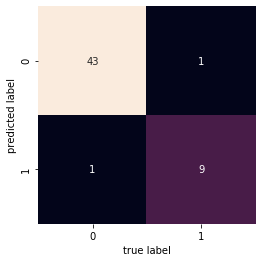

binary classification 0 - 1
PCA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        44
         1.0       0.89      0.80      0.84        10

    accuracy                           0.94        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.94      0.94      0.94        54



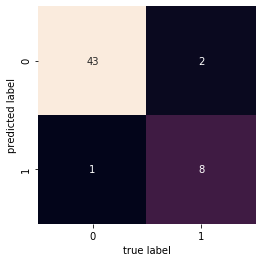

binary classification 0 - 1
PCA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        44
         1.0       0.90      0.90      0.90        10

    accuracy                           0.96        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.96      0.96      0.96        54



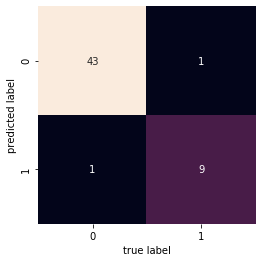

LDA
binary classification 0 - 1
LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        44
         1.0       0.88      0.70      0.78        10

    accuracy                           0.93        54
   macro avg       0.90      0.84      0.87        54
weighted avg       0.92      0.93      0.92        54



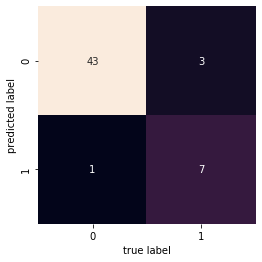

binary classification 0 - 1
LDA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        44
         1.0       0.88      0.70      0.78        10

    accuracy                           0.93        54
   macro avg       0.90      0.84      0.87        54
weighted avg       0.92      0.93      0.92        54



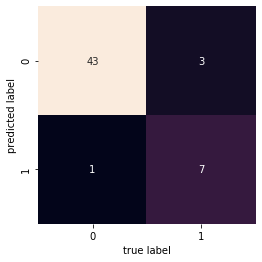

binary classification 0 - 1
LDA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92        44
         1.0       0.80      0.40      0.53        10

    accuracy                           0.87        54
   macro avg       0.84      0.69      0.73        54
weighted avg       0.86      0.87      0.85        54



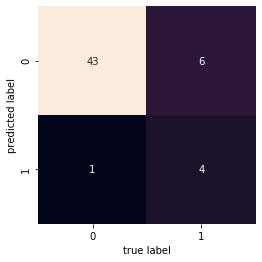

normalized
binary classification 0 - 1
normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        44
         1.0       0.91      1.00      0.95        10

    accuracy                           0.98        54
   macro avg       0.95      0.99      0.97        54
weighted avg       0.98      0.98      0.98        54



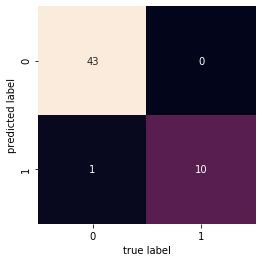

binary classification 0 - 1
normalized
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        44
         1.0       0.91      1.00      0.95        10

    accuracy                           0.98        54
   macro avg       0.95      0.99      0.97        54
weighted avg       0.98      0.98      0.98        54



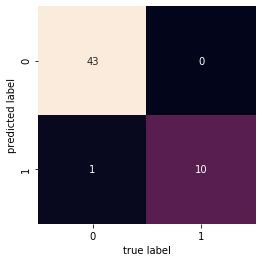

binary classification 0 - 1
normalized
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        44
         1.0       0.91      1.00      0.95        10

    accuracy                           0.98        54
   macro avg       0.95      0.99      0.97        54
weighted avg       0.98      0.98      0.98        54



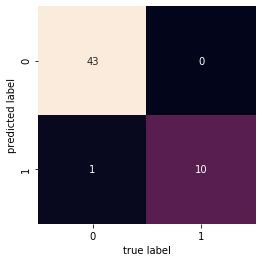

*************************************************************************************************
******************* binary classification 0 - 2 *********************
PCA
binary classification 0 - 2
PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        44
         2.0       1.00      0.63      0.77        19

    accuracy                           0.89        63
   macro avg       0.93      0.82      0.85        63
weighted avg       0.90      0.89      0.88        63



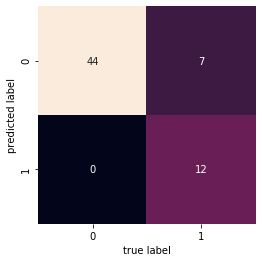

binary classification 0 - 2
PCA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        44
         2.0       1.00      0.79      0.88        19

    accuracy                           0.94        63
   macro avg       0.96      0.89      0.92        63
weighted avg       0.94      0.94      0.93        63



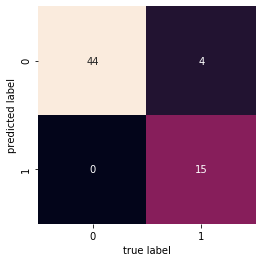

binary classification 0 - 2
PCA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        44
         2.0       1.00      0.58      0.73        19

    accuracy                           0.87        63
   macro avg       0.92      0.79      0.82        63
weighted avg       0.89      0.87      0.86        63



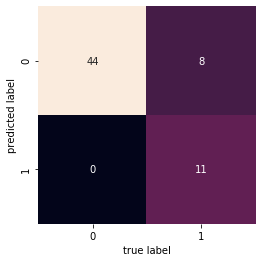

LDA
binary classification 0 - 2
LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91        44
         2.0       0.92      0.63      0.75        19

    accuracy                           0.87        63
   macro avg       0.89      0.80      0.83        63
weighted avg       0.88      0.87      0.87        63



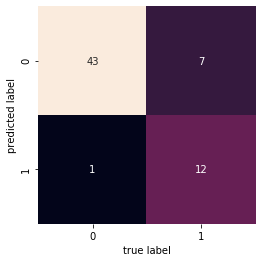

binary classification 0 - 2
LDA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91        44
         2.0       0.92      0.63      0.75        19

    accuracy                           0.87        63
   macro avg       0.89      0.80      0.83        63
weighted avg       0.88      0.87      0.87        63



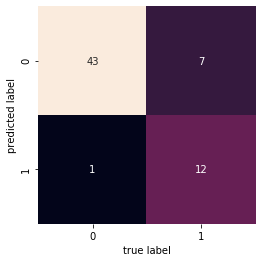

binary classification 0 - 2
LDA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        44
         2.0       1.00      0.47      0.64        19

    accuracy                           0.84        63
   macro avg       0.91      0.74      0.77        63
weighted avg       0.87      0.84      0.82        63



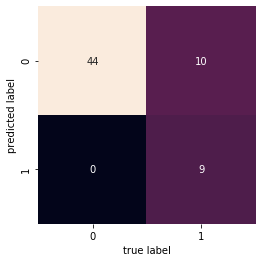

normalized
binary classification 0 - 2
normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        44
         2.0       1.00      0.58      0.73        19

    accuracy                           0.87        63
   macro avg       0.92      0.79      0.82        63
weighted avg       0.89      0.87      0.86        63



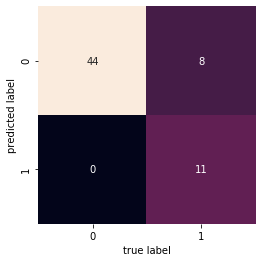

binary classification 0 - 2
normalized
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        44
         2.0       1.00      0.63      0.77        19

    accuracy                           0.89        63
   macro avg       0.93      0.82      0.85        63
weighted avg       0.90      0.89      0.88        63



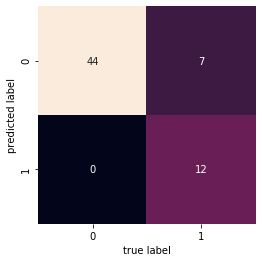

binary classification 0 - 2
normalized
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        44
         2.0       1.00      0.58      0.73        19

    accuracy                           0.87        63
   macro avg       0.92      0.79      0.82        63
weighted avg       0.89      0.87      0.86        63



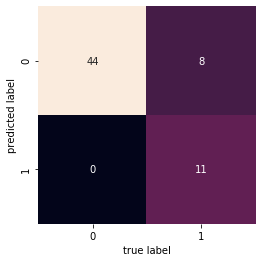

*************************************************************************************************
******************* binary classification 0 - 3 *********************
PCA
binary classification 0 - 3
PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        44
         3.0       0.71      0.56      0.63         9

    accuracy                           0.89        53
   macro avg       0.81      0.76      0.78        53
weighted avg       0.88      0.89      0.88        53



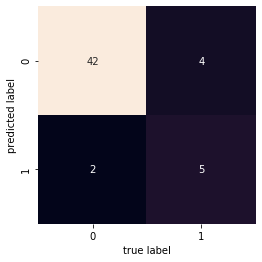

binary classification 0 - 3
PCA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        44
         3.0       0.67      0.67      0.67         9

    accuracy                           0.89        53
   macro avg       0.80      0.80      0.80        53
weighted avg       0.89      0.89      0.89        53



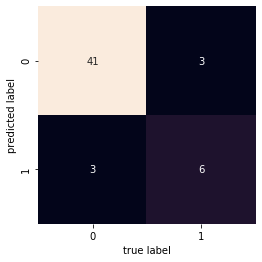

binary classification 0 - 3
PCA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        44
         3.0       0.62      0.56      0.59         9

    accuracy                           0.87        53
   macro avg       0.77      0.74      0.75        53
weighted avg       0.86      0.87      0.86        53



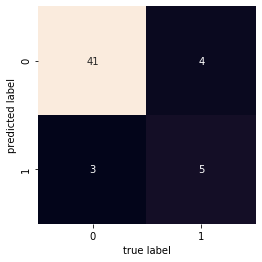

LDA
binary classification 0 - 3
LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        44
         3.0       0.62      0.56      0.59         9

    accuracy                           0.87        53
   macro avg       0.77      0.74      0.75        53
weighted avg       0.86      0.87      0.86        53



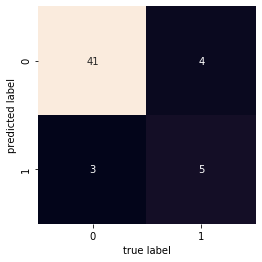

binary classification 0 - 3
LDA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        44
         3.0       0.71      0.56      0.63         9

    accuracy                           0.89        53
   macro avg       0.81      0.76      0.78        53
weighted avg       0.88      0.89      0.88        53



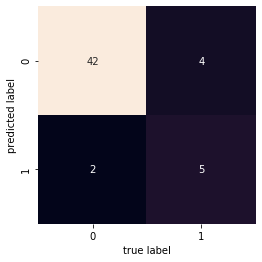

binary classification 0 - 3
LDA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93        44
         3.0       0.80      0.44      0.57         9

    accuracy                           0.89        53
   macro avg       0.85      0.71      0.75        53
weighted avg       0.88      0.89      0.87        53



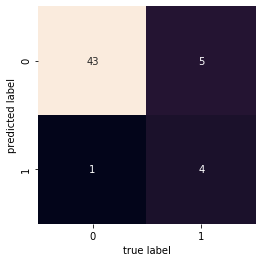

normalized
binary classification 0 - 3
normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        44
         3.0       0.71      0.56      0.63         9

    accuracy                           0.89        53
   macro avg       0.81      0.76      0.78        53
weighted avg       0.88      0.89      0.88        53



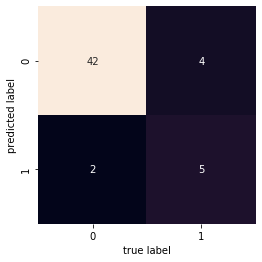

binary classification 0 - 3
normalized
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        44
         3.0       0.71      0.56      0.63         9

    accuracy                           0.89        53
   macro avg       0.81      0.76      0.78        53
weighted avg       0.88      0.89      0.88        53



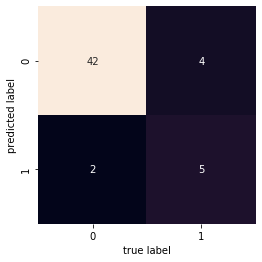

binary classification 0 - 3
normalized
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        44
         3.0       0.71      0.56      0.63         9

    accuracy                           0.89        53
   macro avg       0.81      0.76      0.78        53
weighted avg       0.88      0.89      0.88        53



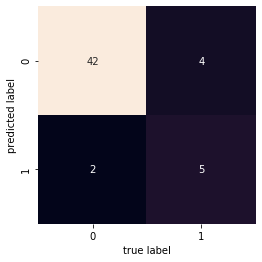

In [7]:
for i in range(1,4):
    all_train = all_trains[i-1]
    all_test = all_tests[i-1]
    print("*************************************************************************************************")
    print('******************* binary classification 0 - '+ str(i)+' *********************')
    for train, test, which in zip(all_train,all_test,all_):
        print(which)
        for activation in ['relu', 'tanh', 'logistic']:
            print('binary classification 0 - '+ str(i))
            print(which)
            print("Activation Function: " + activation)
            model = MLPClassifier(activation=activation)
            model.fit(train,y_train[y_train.isin([0, i])])
            y_predict = model.predict(test)
            plot_print_confusion(y_test[y_test.isin([0, i])],y_predict)
            plt.show()
    print("======================================================")

*************************************************************************************************
******************* binary classification 0 - 1 *********************
PCA
binary classification 0 - 1
PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



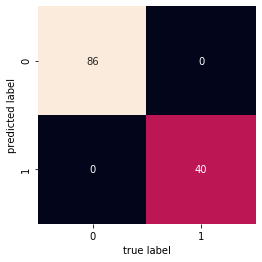

binary classification 0 - 1
PCA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



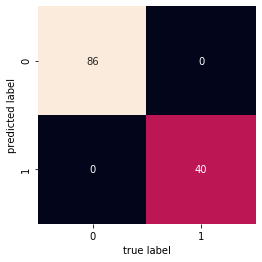

binary classification 0 - 1
PCA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



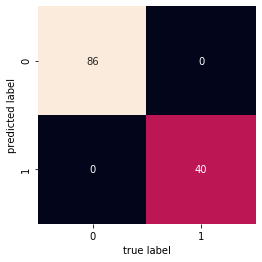

LDA
binary classification 0 - 1
LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97        86
         1.0       0.97      0.88      0.92        40

    accuracy                           0.95       126
   macro avg       0.96      0.93      0.94       126
weighted avg       0.95      0.95      0.95       126



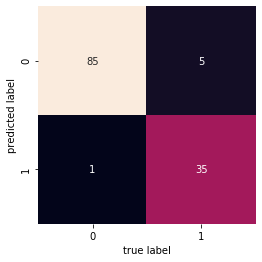

binary classification 0 - 1
LDA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        86
         1.0       0.92      0.88      0.90        40

    accuracy                           0.94       126
   macro avg       0.93      0.92      0.93       126
weighted avg       0.94      0.94      0.94       126



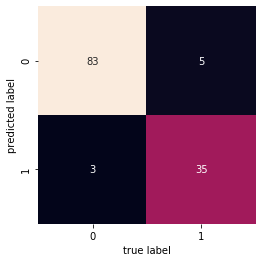

binary classification 0 - 1
LDA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97        86
         1.0       0.97      0.88      0.92        40

    accuracy                           0.95       126
   macro avg       0.96      0.93      0.94       126
weighted avg       0.95      0.95      0.95       126



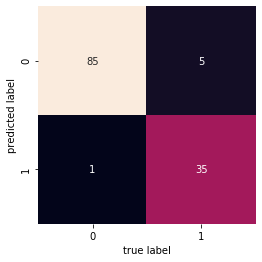

normalized
binary classification 0 - 1
normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



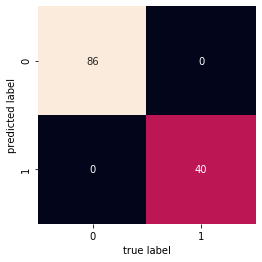

binary classification 0 - 1
normalized
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



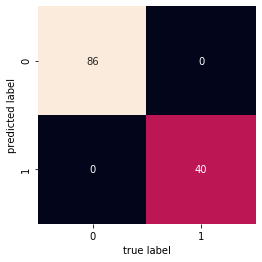

binary classification 0 - 1
normalized
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00        40

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



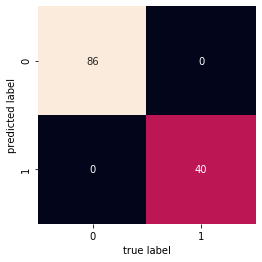

*************************************************************************************************
******************* binary classification 0 - 2 *********************
PCA
binary classification 0 - 2
PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         2.0       1.00      1.00      1.00        30

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



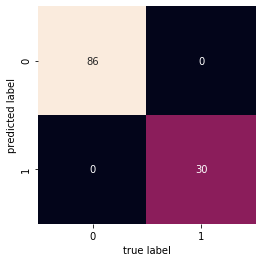

binary classification 0 - 2
PCA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         2.0       1.00      1.00      1.00        30

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



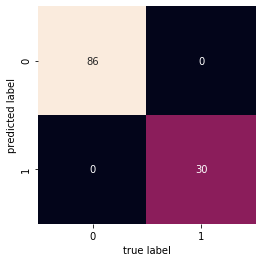

binary classification 0 - 2
PCA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         2.0       1.00      1.00      1.00        30

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



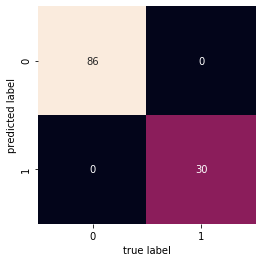

LDA
binary classification 0 - 2
LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        86
         2.0       0.97      0.97      0.97        30

    accuracy                           0.98       116
   macro avg       0.98      0.98      0.98       116
weighted avg       0.98      0.98      0.98       116



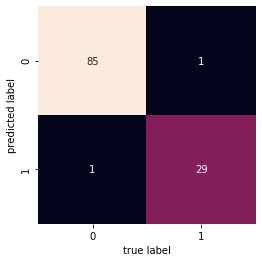

binary classification 0 - 2
LDA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        86
         2.0       0.97      0.97      0.97        30

    accuracy                           0.98       116
   macro avg       0.98      0.98      0.98       116
weighted avg       0.98      0.98      0.98       116



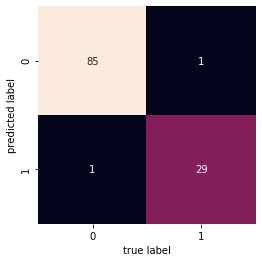

binary classification 0 - 2
LDA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        86
         2.0       1.00      0.80      0.89        30

    accuracy                           0.95       116
   macro avg       0.97      0.90      0.93       116
weighted avg       0.95      0.95      0.95       116



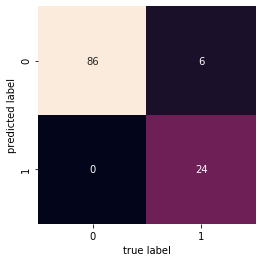

normalized
binary classification 0 - 2
normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         2.0       1.00      1.00      1.00        30

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



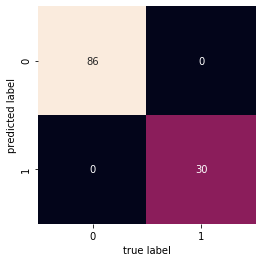

binary classification 0 - 2
normalized
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         2.0       1.00      1.00      1.00        30

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



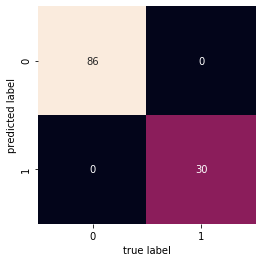

binary classification 0 - 2
normalized
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         2.0       1.00      1.00      1.00        30

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



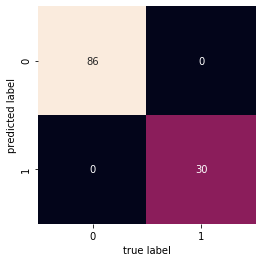

*************************************************************************************************
******************* binary classification 0 - 3 *********************
PCA
binary classification 0 - 3
PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



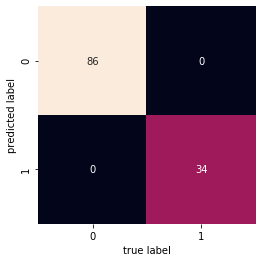

binary classification 0 - 3
PCA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



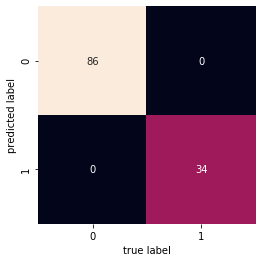

binary classification 0 - 3
PCA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



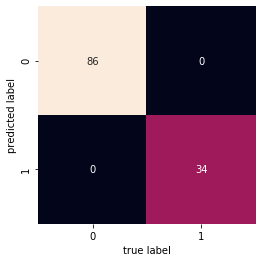

LDA
binary classification 0 - 3
LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        86
         3.0       0.94      0.91      0.93        34

    accuracy                           0.96       120
   macro avg       0.95      0.94      0.95       120
weighted avg       0.96      0.96      0.96       120



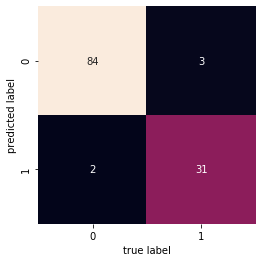

binary classification 0 - 3
LDA
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        86
         3.0       0.94      0.91      0.93        34

    accuracy                           0.96       120
   macro avg       0.95      0.94      0.95       120
weighted avg       0.96      0.96      0.96       120



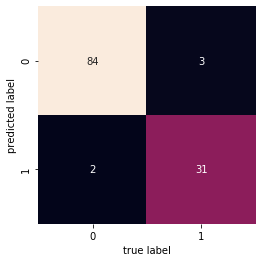

binary classification 0 - 3
LDA
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        86
         3.0       1.00      0.82      0.90        34

    accuracy                           0.95       120
   macro avg       0.97      0.91      0.93       120
weighted avg       0.95      0.95      0.95       120



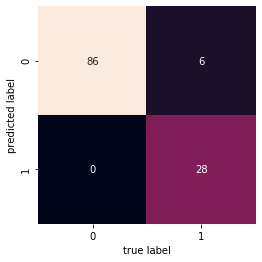

normalized
binary classification 0 - 3
normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



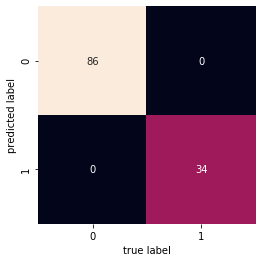

binary classification 0 - 3
normalized
Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



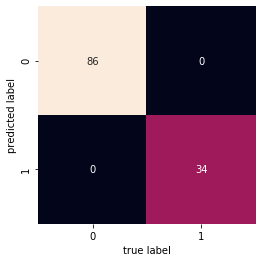

binary classification 0 - 3
normalized
Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         3.0       1.00      1.00      1.00        34

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



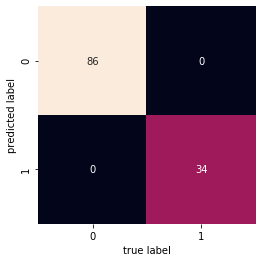

In [8]:
for i in range(1,4):
    all_train = all_trains[i-1]
    all_test = all_tests[i-1]
    print("*************************************************************************************************")
    print('******************* binary classification 0 - '+ str(i)+' *********************')
    for train, test, which in zip(all_train,all_test,all_):
        print(which)
        for activation in ['relu', 'tanh', 'logistic']:
            print('binary classification 0 - '+ str(i))
            print(which)
            print("Activation Function: " + activation)
            model = MLPClassifier(activation=activation)
            model.fit(train,y_train[y_train.isin([0, i])])
            y_predict = model.predict(train)
            plot_print_confusion(y_train[y_train.isin([0, i])],y_predict)
            plt.show()
    print("======================================================")

*************************************************************************************************
******************* binary classification 0 - 1 *********************
PCA
binary classification 0 - 1
PCA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        44
         1.0       0.90      0.90      0.90        10

    accuracy                           0.96        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.96      0.96      0.96        54



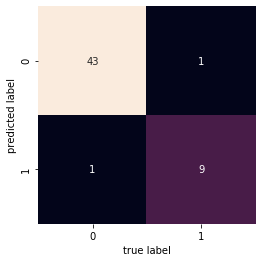

binary classification 0 - 1
PCA
Kernel: poly
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        44
         1.0       0.00      0.00      0.00        10

    accuracy                           0.81        54
   macro avg       0.41      0.50      0.45        54
weighted avg       0.66      0.81      0.73        54



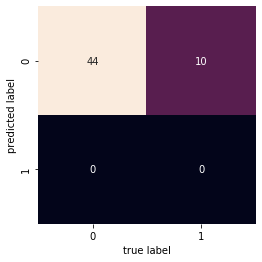

binary classification 0 - 1
PCA
Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        44
         1.0       1.00      0.50      0.67        10

    accuracy                           0.91        54
   macro avg       0.95      0.75      0.81        54
weighted avg       0.92      0.91      0.89        54



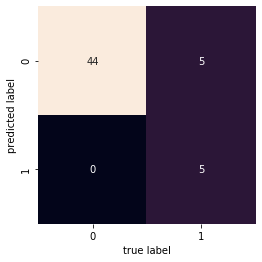

binary classification 0 - 1
PCA
Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        44
         1.0       0.90      0.90      0.90        10

    accuracy                           0.96        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.96      0.96      0.96        54



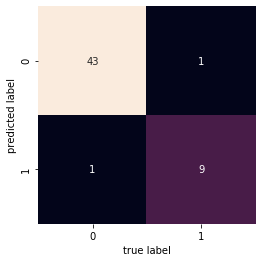

LDA
binary classification 0 - 1
LDA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        44
         1.0       0.88      0.70      0.78        10

    accuracy                           0.93        54
   macro avg       0.90      0.84      0.87        54
weighted avg       0.92      0.93      0.92        54



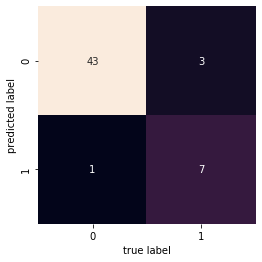

binary classification 0 - 1
LDA
Kernel: poly
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        44
         1.0       1.00      0.50      0.67        10

    accuracy                           0.91        54
   macro avg       0.95      0.75      0.81        54
weighted avg       0.92      0.91      0.89        54



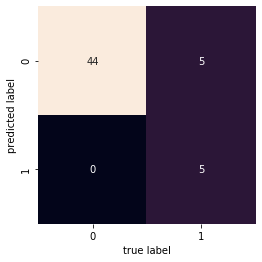

binary classification 0 - 1
LDA
Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        44
         1.0       0.86      0.60      0.71        10

    accuracy                           0.91        54
   macro avg       0.89      0.79      0.83        54
weighted avg       0.90      0.91      0.90        54



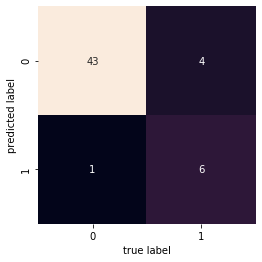

binary classification 0 - 1
LDA
Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        44
         1.0       0.89      0.80      0.84        10

    accuracy                           0.94        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.94      0.94      0.94        54



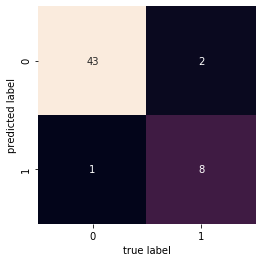

normalized
binary classification 0 - 1
normalized
Kernel: linear
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        44
         1.0       0.91      1.00      0.95        10

    accuracy                           0.98        54
   macro avg       0.95      0.99      0.97        54
weighted avg       0.98      0.98      0.98        54



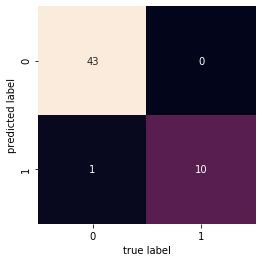

binary classification 0 - 1
normalized
Kernel: poly
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        44
         1.0       0.91      1.00      0.95        10

    accuracy                           0.98        54
   macro avg       0.95      0.99      0.97        54
weighted avg       0.98      0.98      0.98        54



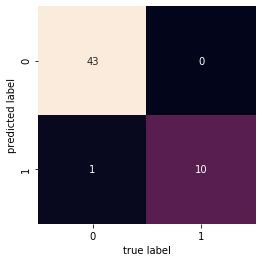

binary classification 0 - 1
normalized
Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        44
         1.0       0.88      0.70      0.78        10

    accuracy                           0.93        54
   macro avg       0.90      0.84      0.87        54
weighted avg       0.92      0.93      0.92        54



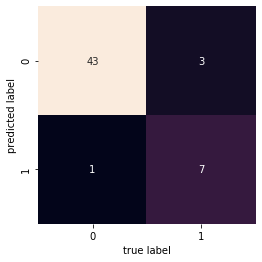

binary classification 0 - 1
normalized
Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        44
         1.0       1.00      0.30      0.46        10

    accuracy                           0.87        54
   macro avg       0.93      0.65      0.69        54
weighted avg       0.89      0.87      0.84        54



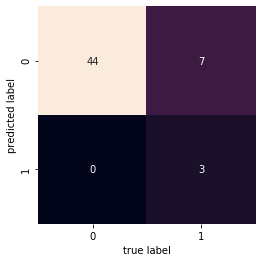

*************************************************************************************************
******************* binary classification 0 - 2 *********************
PCA
binary classification 0 - 2
PCA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        44
         2.0       1.00      0.68      0.81        19

    accuracy                           0.90        63
   macro avg       0.94      0.84      0.87        63
weighted avg       0.92      0.90      0.90        63



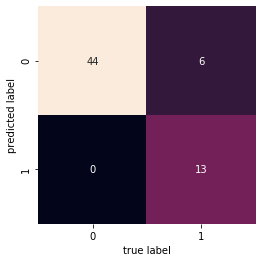

binary classification 0 - 2
PCA
Kernel: poly
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        44
         2.0       1.00      0.11      0.19        19

    accuracy                           0.73        63
   macro avg       0.86      0.55      0.51        63
weighted avg       0.81      0.73      0.64        63



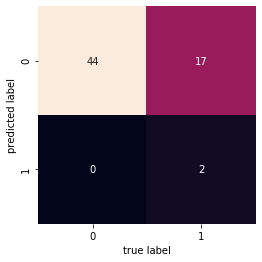

binary classification 0 - 2
PCA
Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        44
         2.0       1.00      0.53      0.69        19

    accuracy                           0.86        63
   macro avg       0.92      0.76      0.80        63
weighted avg       0.88      0.86      0.84        63



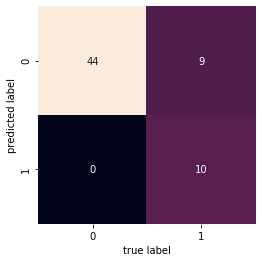

binary classification 0 - 2
PCA
Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        44
         2.0       1.00      0.58      0.73        19

    accuracy                           0.87        63
   macro avg       0.92      0.79      0.82        63
weighted avg       0.89      0.87      0.86        63



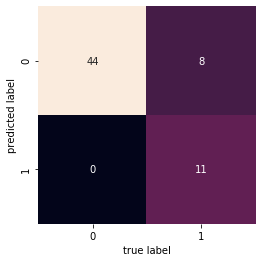

LDA
binary classification 0 - 2
LDA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        44
         2.0       1.00      0.63      0.77        19

    accuracy                           0.89        63
   macro avg       0.93      0.82      0.85        63
weighted avg       0.90      0.89      0.88        63



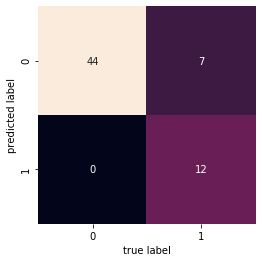

binary classification 0 - 2
LDA
Kernel: poly
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89        44
         2.0       0.90      0.47      0.62        19

    accuracy                           0.83        63
   macro avg       0.86      0.73      0.75        63
weighted avg       0.84      0.83      0.81        63



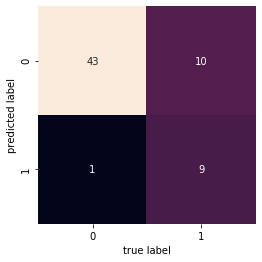

binary classification 0 - 2
LDA
Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        44
         2.0       1.00      0.63      0.77        19

    accuracy                           0.89        63
   macro avg       0.93      0.82      0.85        63
weighted avg       0.90      0.89      0.88        63



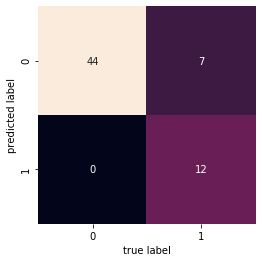

binary classification 0 - 2
LDA
Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        44
         2.0       0.86      0.63      0.73        19

    accuracy                           0.86        63
   macro avg       0.86      0.79      0.82        63
weighted avg       0.86      0.86      0.85        63



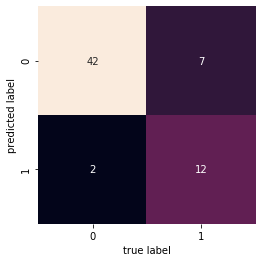

normalized
binary classification 0 - 2
normalized
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        44
         2.0       1.00      0.68      0.81        19

    accuracy                           0.90        63
   macro avg       0.94      0.84      0.87        63
weighted avg       0.92      0.90      0.90        63



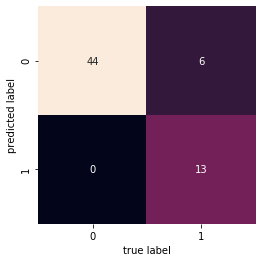

binary classification 0 - 2
normalized
Kernel: poly
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        44
         2.0       1.00      0.58      0.73        19

    accuracy                           0.87        63
   macro avg       0.92      0.79      0.82        63
weighted avg       0.89      0.87      0.86        63



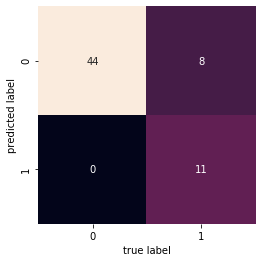

binary classification 0 - 2
normalized
Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        44
         2.0       1.00      0.58      0.73        19

    accuracy                           0.87        63
   macro avg       0.92      0.79      0.82        63
weighted avg       0.89      0.87      0.86        63



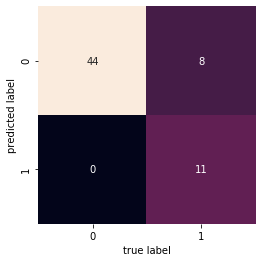

binary classification 0 - 2
normalized
Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83        44
         2.0       1.00      0.05      0.10        19

    accuracy                           0.71        63
   macro avg       0.85      0.53      0.47        63
weighted avg       0.80      0.71      0.61        63



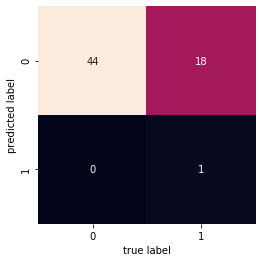

*************************************************************************************************
******************* binary classification 0 - 3 *********************
PCA
binary classification 0 - 3
PCA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        44
         3.0       0.83      0.56      0.67         9

    accuracy                           0.91        53
   macro avg       0.87      0.77      0.81        53
weighted avg       0.90      0.91      0.90        53



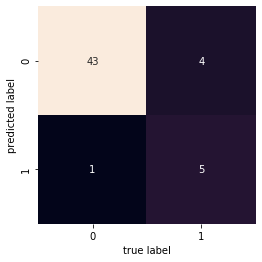

binary classification 0 - 3
PCA
Kernel: poly
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        44
         3.0       0.00      0.00      0.00         9

    accuracy                           0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53



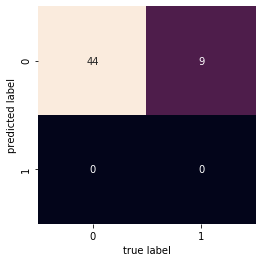

binary classification 0 - 3
PCA
Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        44
         3.0       0.71      0.56      0.63         9

    accuracy                           0.89        53
   macro avg       0.81      0.76      0.78        53
weighted avg       0.88      0.89      0.88        53



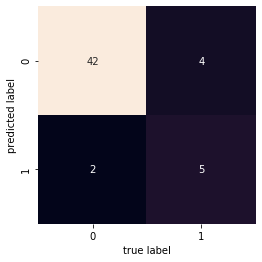

binary classification 0 - 3
PCA
Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        44
         3.0       0.71      0.56      0.63         9

    accuracy                           0.89        53
   macro avg       0.81      0.76      0.78        53
weighted avg       0.88      0.89      0.88        53



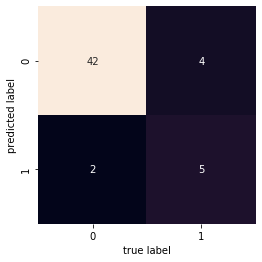

LDA
binary classification 0 - 3
LDA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.93        44
         3.0       0.80      0.44      0.57         9

    accuracy                           0.89        53
   macro avg       0.85      0.71      0.75        53
weighted avg       0.88      0.89      0.87        53



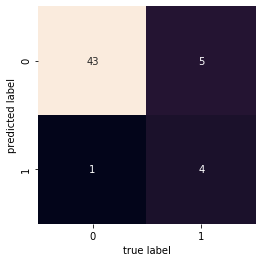

binary classification 0 - 3
LDA
Kernel: poly
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92        44
         3.0       0.75      0.33      0.46         9

    accuracy                           0.87        53
   macro avg       0.81      0.66      0.69        53
weighted avg       0.86      0.87      0.85        53



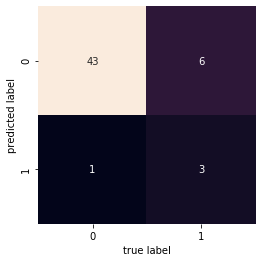

binary classification 0 - 3
LDA
Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        44
         3.0       0.83      0.56      0.67         9

    accuracy                           0.91        53
   macro avg       0.87      0.77      0.81        53
weighted avg       0.90      0.91      0.90        53



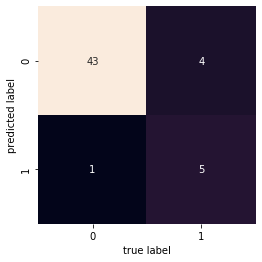

binary classification 0 - 3
LDA
Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        44
         3.0       0.62      0.56      0.59         9

    accuracy                           0.87        53
   macro avg       0.77      0.74      0.75        53
weighted avg       0.86      0.87      0.86        53



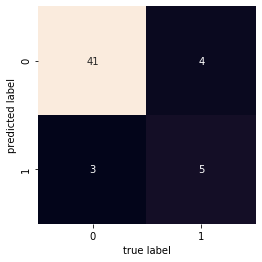

normalized
binary classification 0 - 3
normalized
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        44
         3.0       0.71      0.56      0.63         9

    accuracy                           0.89        53
   macro avg       0.81      0.76      0.78        53
weighted avg       0.88      0.89      0.88        53



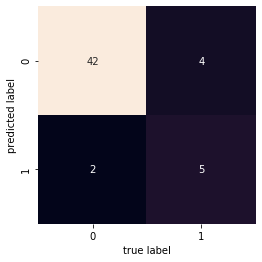

binary classification 0 - 3
normalized
Kernel: poly
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        44
         3.0       0.71      0.56      0.63         9

    accuracy                           0.89        53
   macro avg       0.81      0.76      0.78        53
weighted avg       0.88      0.89      0.88        53



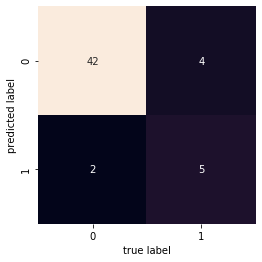

binary classification 0 - 3
normalized
Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        44
         3.0       0.71      0.56      0.63         9

    accuracy                           0.89        53
   macro avg       0.81      0.76      0.78        53
weighted avg       0.88      0.89      0.88        53



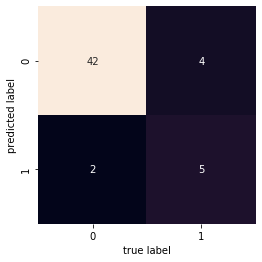

binary classification 0 - 3
normalized
Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        44
         3.0       0.00      0.00      0.00         9

    accuracy                           0.83        53
   macro avg       0.42      0.50      0.45        53
weighted avg       0.69      0.83      0.75        53



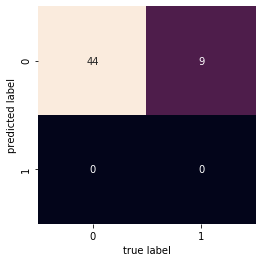

In [9]:
for i in range(1,4):
    all_train = all_trains[i-1]
    all_test = all_tests[i-1]
    print("*************************************************************************************************")
    print('******************* binary classification 0 - '+ str(i)+' *********************')
    for train, test, which in zip(all_train,all_test,all_):
        print(which)
        for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
            print('binary classification 0 - '+ str(i))
            print(which)
            print("Kernel: " + kernel)
            model = SVC(kernel=kernel)
            model.fit(train,y_train[y_train.isin([0, i])])
            y_predict = model.predict(test)
            plot_print_confusion(y_test[y_test.isin([0, i])],y_predict)
            plt.show()
        print("==================================================================================")

In [10]:
Y1 = Y
Y1[Y1!=0]=1

In [11]:
Y = frame.loc[:,'class']
X = frame.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.3, random_state=42)

In [12]:
numeric_transformer = Pipeline(steps=[ ('scaler',MinMaxScaler()),('pca',PCA(n_components=99))])
X_train_tr = numeric_transformer.fit_transform(X_train)
X_test_tr = numeric_transformer.transform(X_test)
numeric_transformer_ld = Pipeline(steps=[ ('scaler',MinMaxScaler()),('lda',LinearDiscriminantAnalysis())])
X_train_ld = numeric_transformer_ld.fit_transform(X_train,y_train)
X_test_ld = numeric_transformer_ld.transform(X_test)
scaler = MinMaxScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [13]:
all_test = [X_test_tr,X_test_ld,X_test_]
all_train = [X_train_tr,X_train_ld,X_train_]

PCA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87        44
         1.0       0.83      0.89      0.86        38

    accuracy                           0.87        82
   macro avg       0.87      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82



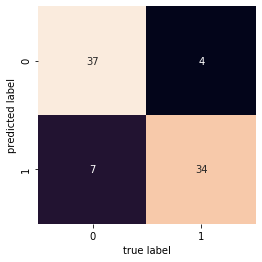

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77        44
         1.0       1.00      0.29      0.45        38

    accuracy                           0.67        82
   macro avg       0.81      0.64      0.61        82
weighted avg       0.80      0.67      0.62        82



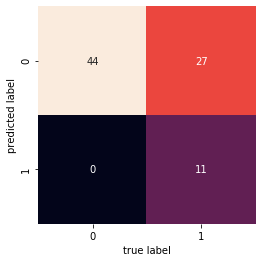

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86        44
         1.0       0.96      0.66      0.78        38

    accuracy                           0.83        82
   macro avg       0.86      0.82      0.82        82
weighted avg       0.86      0.83      0.82        82



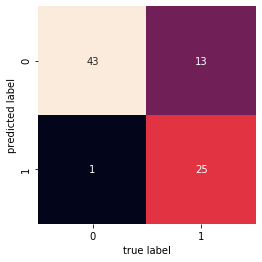

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        44
         1.0       0.88      0.79      0.83        38

    accuracy                           0.85        82
   macro avg       0.86      0.85      0.85        82
weighted avg       0.86      0.85      0.85        82



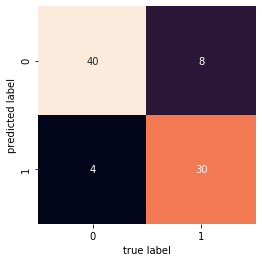

LDA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83        44
         1.0       0.84      0.71      0.77        38

    accuracy                           0.80        82
   macro avg       0.81      0.80      0.80        82
weighted avg       0.81      0.80      0.80        82



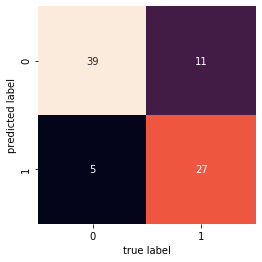

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.85      0.80      0.82        44
         1.0       0.78      0.84      0.81        38

    accuracy                           0.82        82
   macro avg       0.82      0.82      0.82        82
weighted avg       0.82      0.82      0.82        82



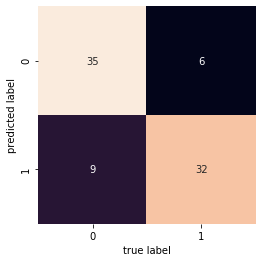

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85        44
         1.0       0.90      0.71      0.79        38

    accuracy                           0.83        82
   macro avg       0.84      0.82      0.82        82
weighted avg       0.84      0.83      0.83        82



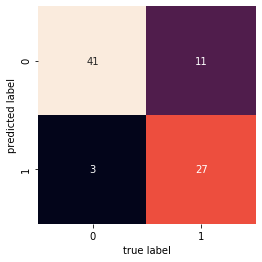

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.79      0.95      0.87        44
         1.0       0.93      0.71      0.81        38

    accuracy                           0.84        82
   macro avg       0.86      0.83      0.84        82
weighted avg       0.86      0.84      0.84        82



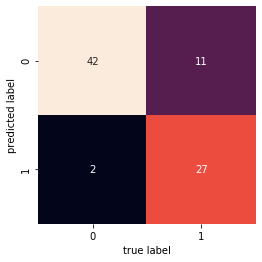

normalized
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        44
         1.0       0.87      0.87      0.87        38

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



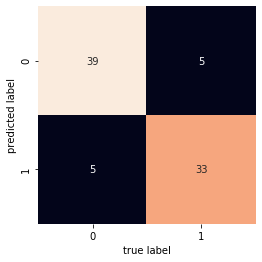

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        44
         1.0       0.85      0.87      0.86        38

    accuracy                           0.87        82
   macro avg       0.86      0.87      0.87        82
weighted avg       0.87      0.87      0.87        82



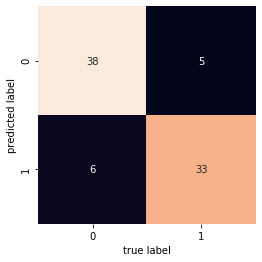

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        44
         1.0       0.88      0.79      0.83        38

    accuracy                           0.85        82
   macro avg       0.86      0.85      0.85        82
weighted avg       0.86      0.85      0.85        82



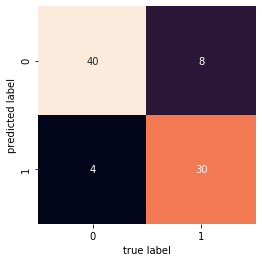

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.84        44
         1.0       0.83      0.76      0.79        38

    accuracy                           0.82        82
   macro avg       0.82      0.81      0.81        82
weighted avg       0.82      0.82      0.82        82



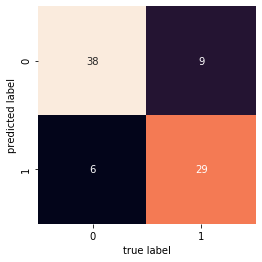

In [14]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        print("Kernel: " + kernel)
        model = SVC(kernel=kernel)
        model.fit(train,y_train)
        y_predict = model.predict(test)
        plot_print_confusion(y_test,y_predict)
        plt.show()
    print("=======================================")

PCA
Kernel: linear
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



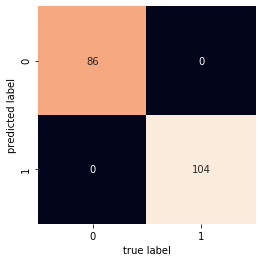

Kernel: poly
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



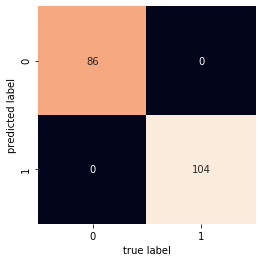

Kernel: rbf
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



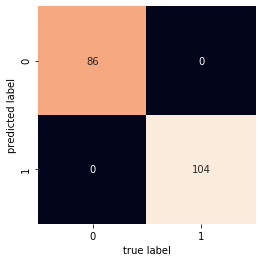

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88        86
         1.0       0.91      0.88      0.90       104

    accuracy                           0.89       190
   macro avg       0.89      0.89      0.89       190
weighted avg       0.89      0.89      0.89       190



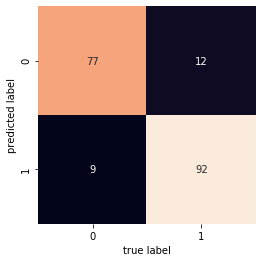

LDA
Kernel: linear
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        86
         1.0       0.92      0.89      0.91       104

    accuracy                           0.90       190
   macro avg       0.90      0.90      0.90       190
weighted avg       0.90      0.90      0.90       190



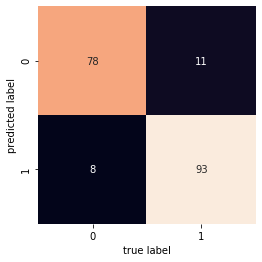

Kernel: poly
              precision    recall  f1-score   support

         0.0       0.93      0.74      0.83        86
         1.0       0.82      0.95      0.88       104

    accuracy                           0.86       190
   macro avg       0.87      0.85      0.85       190
weighted avg       0.87      0.86      0.86       190



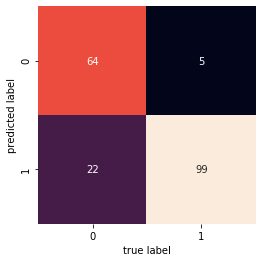

Kernel: rbf
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        86
         1.0       0.92      0.89      0.91       104

    accuracy                           0.90       190
   macro avg       0.90      0.90      0.90       190
weighted avg       0.90      0.90      0.90       190



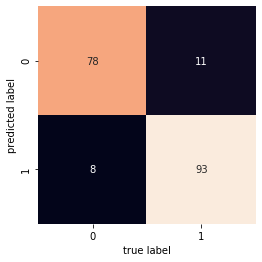

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87        86
         1.0       0.89      0.89      0.89       104

    accuracy                           0.88       190
   macro avg       0.88      0.88      0.88       190
weighted avg       0.88      0.88      0.88       190



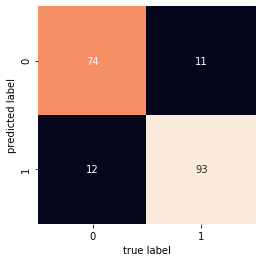

normalized
Kernel: linear
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



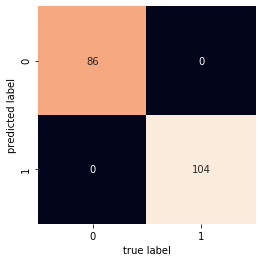

Kernel: poly
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



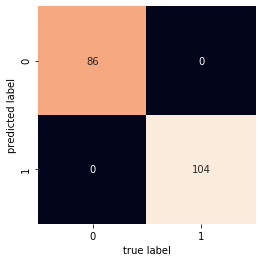

Kernel: rbf
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        86
         1.0       0.98      1.00      0.99       104

    accuracy                           0.99       190
   macro avg       0.99      0.99      0.99       190
weighted avg       0.99      0.99      0.99       190



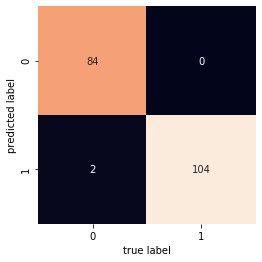

Kernel: sigmoid
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        86
         1.0       0.90      0.81      0.85       104

    accuracy                           0.85       190
   macro avg       0.85      0.85      0.85       190
weighted avg       0.85      0.85      0.85       190



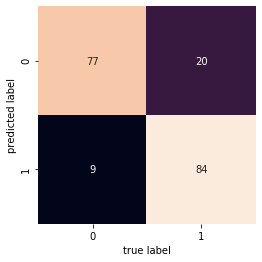

In [15]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        print("Kernel: " + kernel)
        model = SVC(kernel=kernel)
        model.fit(train,y_train)
        y_predict = model.predict(train)
        plot_print_confusion(y_train,y_predict)
        plt.show()
    print("=======================================")

PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        44
         1.0       0.87      0.87      0.87        38

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



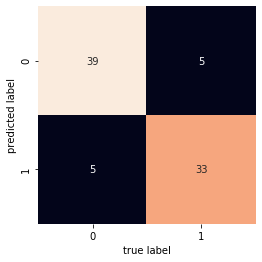

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        44
         1.0       0.91      0.82      0.86        38

    accuracy                           0.88        82
   macro avg       0.88      0.87      0.88        82
weighted avg       0.88      0.88      0.88        82



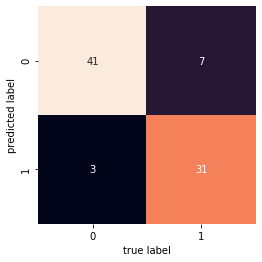

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91        44
         1.0       0.88      0.92      0.90        38

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



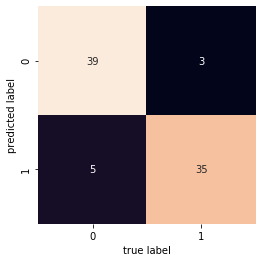

LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85        44
         1.0       0.90      0.71      0.79        38

    accuracy                           0.83        82
   macro avg       0.84      0.82      0.82        82
weighted avg       0.84      0.83      0.83        82



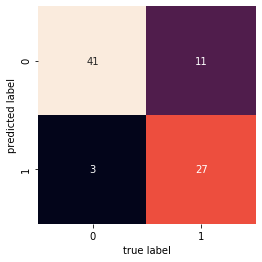

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83        44
         1.0       0.84      0.71      0.77        38

    accuracy                           0.80        82
   macro avg       0.81      0.80      0.80        82
weighted avg       0.81      0.80      0.80        82



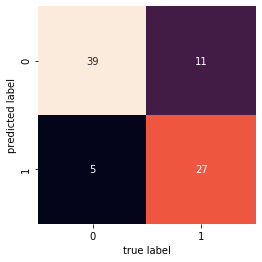

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83        44
         1.0       0.84      0.71      0.77        38

    accuracy                           0.80        82
   macro avg       0.81      0.80      0.80        82
weighted avg       0.81      0.80      0.80        82



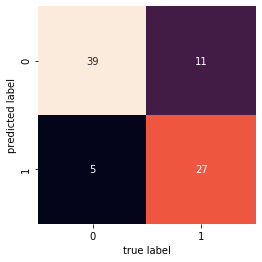

normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        44
         1.0       0.86      0.84      0.85        38

    accuracy                           0.87        82
   macro avg       0.87      0.86      0.86        82
weighted avg       0.87      0.87      0.87        82



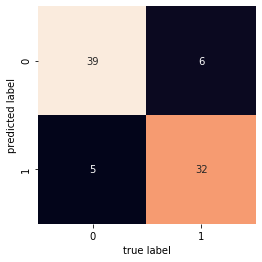

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        44
         1.0       0.89      0.89      0.89        38

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82



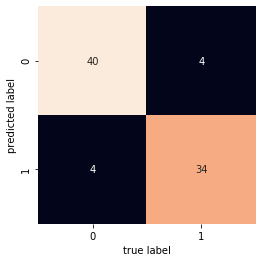

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88        44
         1.0       0.89      0.82      0.85        38

    accuracy                           0.87        82
   macro avg       0.87      0.86      0.86        82
weighted avg       0.87      0.87      0.87        82



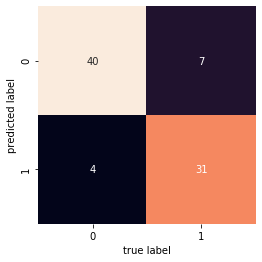

In [16]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for activation in ['relu', 'tanh', 'logistic']:
        print("Activation Function: " + activation)
        model = MLPClassifier(activation=activation)
        model.fit(train,y_train)
        y_predict = model.predict(test)
        plot_print_confusion(y_test,y_predict)
        plt.show()
    print("===================================================")

PCA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



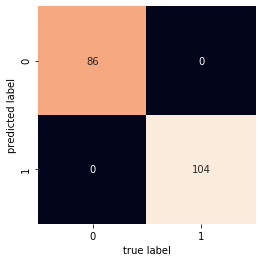

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



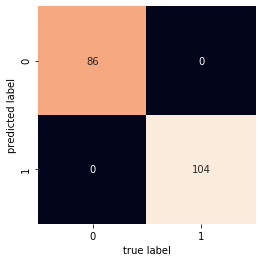

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



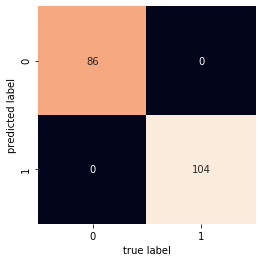

LDA
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



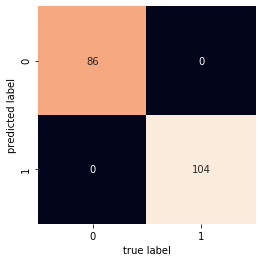

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



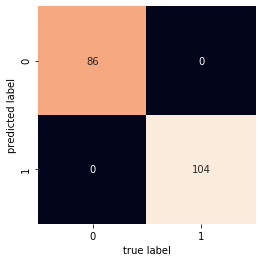

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



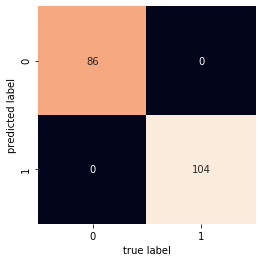

normalized
Activation Function: relu
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



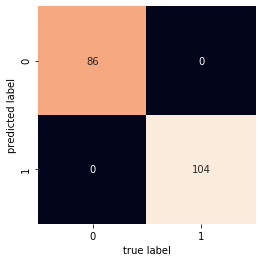

Activation Function: tanh
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



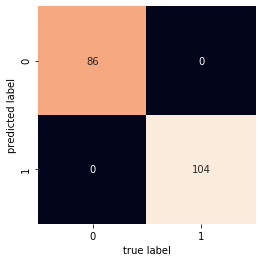

Activation Function: logistic
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



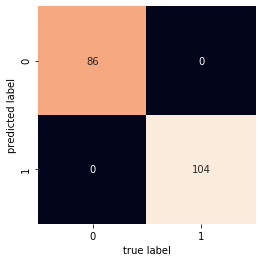

In [17]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for activation in ['relu', 'tanh', 'logistic']:
        print("Activation Function: " + activation)
        model = MLPClassifier(activation=activation)
        model.fit(X_train_tr,y_train)
        y_predict = model.predict(X_train_tr)
        plot_print_confusion(y_train,y_predict)
        plt.show()
    print("======================================================")

PCA
              precision    recall  f1-score   support

         0.0       0.69      0.91      0.78        44
         1.0       0.83      0.53      0.65        38

    accuracy                           0.73        82
   macro avg       0.76      0.72      0.71        82
weighted avg       0.76      0.73      0.72        82



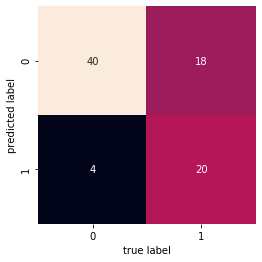

LDA
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83        44
         1.0       0.84      0.71      0.77        38

    accuracy                           0.80        82
   macro avg       0.81      0.80      0.80        82
weighted avg       0.81      0.80      0.80        82



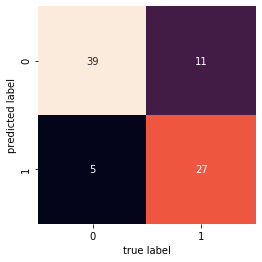

normalized
              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81        44
         1.0       0.85      0.61      0.71        38

    accuracy                           0.77        82
   macro avg       0.79      0.76      0.76        82
weighted avg       0.79      0.77      0.76        82



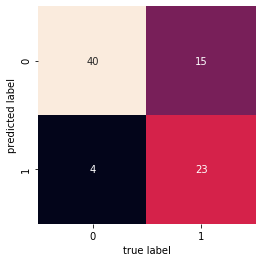

In [18]:
 for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    kernel = 1.0 * RBF(1.0)
    model = GaussianProcessClassifier(kernel=kernel)
    model.fit(train,y_train)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("===================================================")

PCA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



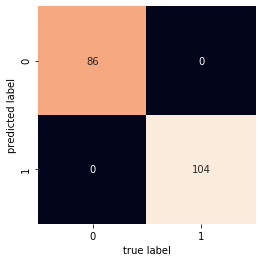

LDA
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        86
         1.0       0.92      0.89      0.91       104

    accuracy                           0.90       190
   macro avg       0.90      0.90      0.90       190
weighted avg       0.90      0.90      0.90       190



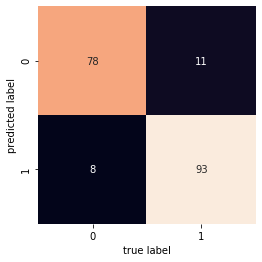

normalized
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



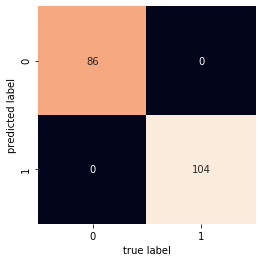

In [19]:
 for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    kernel = 1.0 * RBF(1.0)
    model = GaussianProcessClassifier(kernel=kernel)
    model.fit(train,y_train)
    y_predict = model.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("=================================================")

PCA
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88        44
         1.0       0.83      0.92      0.88        38

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



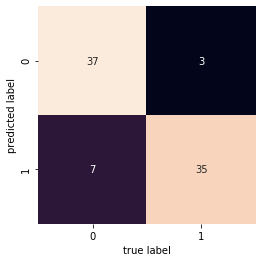

LDA
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83        44
         1.0       0.84      0.71      0.77        38

    accuracy                           0.80        82
   macro avg       0.81      0.80      0.80        82
weighted avg       0.81      0.80      0.80        82



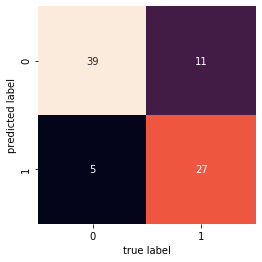

normalized
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        44
         1.0       0.87      0.87      0.87        38

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



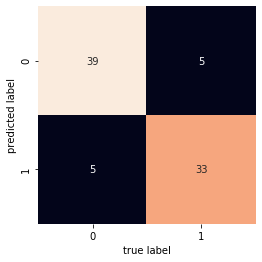

In [20]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    model = LogisticRegression()
    model.fit(train,y_train)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("=====================================================")

PCA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



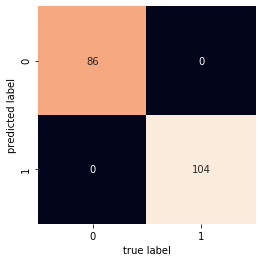

LDA
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        86
         1.0       0.92      0.89      0.91       104

    accuracy                           0.90       190
   macro avg       0.90      0.90      0.90       190
weighted avg       0.90      0.90      0.90       190



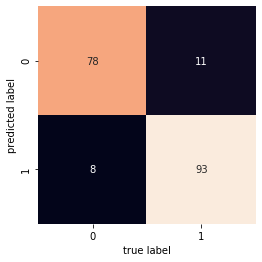

normalized
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



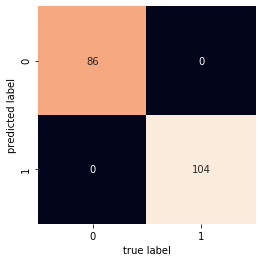

In [21]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    model = LogisticRegression()
    model.fit(train,y_train)
    y_predict = model.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("======================================================")

PCA
              precision    recall  f1-score   support

         0.0       0.67      0.98      0.80        44
         1.0       0.94      0.45      0.61        38

    accuracy                           0.73        82
   macro avg       0.81      0.71      0.70        82
weighted avg       0.80      0.73      0.71        82



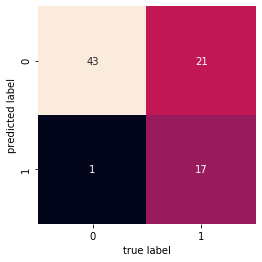

LDA
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85        44
         1.0       0.90      0.71      0.79        38

    accuracy                           0.83        82
   macro avg       0.84      0.82      0.82        82
weighted avg       0.84      0.83      0.83        82



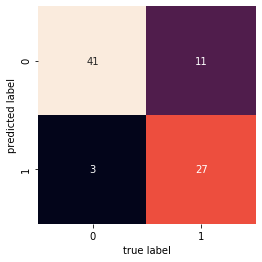

normalized
              precision    recall  f1-score   support

         0.0       0.68      0.98      0.80        44
         1.0       0.95      0.47      0.63        38

    accuracy                           0.74        82
   macro avg       0.81      0.73      0.72        82
weighted avg       0.81      0.74      0.72        82



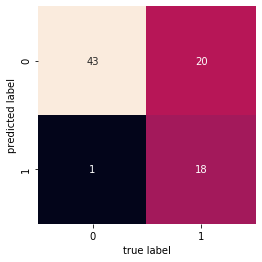

In [22]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(train,y_train)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("==============================================")

PCA
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83        44
         1.0       0.87      0.68      0.76        38

    accuracy                           0.80        82
   macro avg       0.82      0.80      0.80        82
weighted avg       0.81      0.80      0.80        82



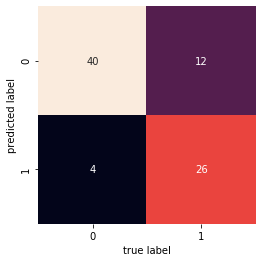

LDA
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82        44
         1.0       0.81      0.76      0.78        38

    accuracy                           0.80        82
   macro avg       0.80      0.80      0.80        82
weighted avg       0.80      0.80      0.80        82



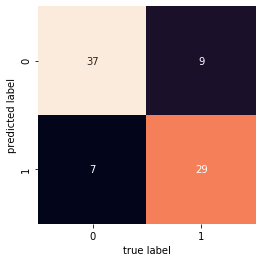

normalized
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80        44
         1.0       0.77      0.79      0.78        38

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.79      0.79      0.79        82



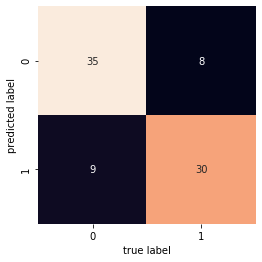

In [23]:
for train, test, which, f in zip(all_train,all_test,all_,[99,1,1269]):
    print(which)
    over = SMOTE()
    pipeline = Pipeline([('over', over)])
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.7, max_features=f, max_depth=5, random_state=2)
    X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
    gb_clf.fit(X_train_tr_ov, y_train_ov)
    y_predict = gb_clf.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("============================================")

PCA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



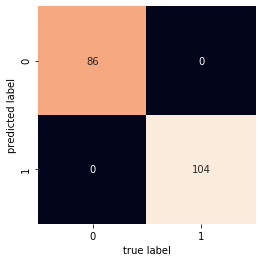

LDA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



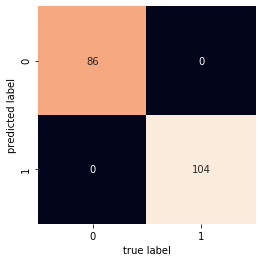

normalized
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



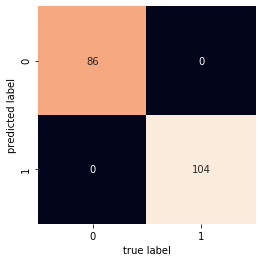

In [24]:
for train, test, which,f in zip(all_train,all_test,all_,[99,1,1269]):
    print(which)
    over = SMOTE()
    pipeline = Pipeline([('over', over)])
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.7, max_features=f, max_depth=5, random_state=2)
    X_train_tr_ov, y_train_ov = pipeline.fit_resample(train, y_train)
    gb_clf.fit(X_train_tr_ov, y_train_ov)
    y_predict = gb_clf.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("========================================")

PCA
              precision    recall  f1-score   support

         0.0       0.69      0.91      0.78        44
         1.0       0.83      0.53      0.65        38

    accuracy                           0.73        82
   macro avg       0.76      0.72      0.71        82
weighted avg       0.76      0.73      0.72        82



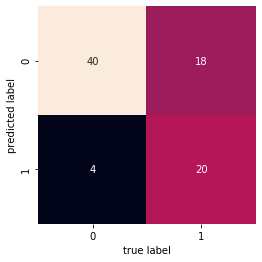

LDA
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83        44
         1.0       0.84      0.71      0.77        38

    accuracy                           0.80        82
   macro avg       0.81      0.80      0.80        82
weighted avg       0.81      0.80      0.80        82



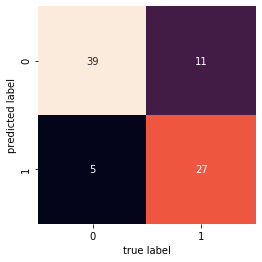

normalized
              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81        44
         1.0       0.85      0.61      0.71        38

    accuracy                           0.77        82
   macro avg       0.79      0.76      0.76        82
weighted avg       0.79      0.77      0.76        82



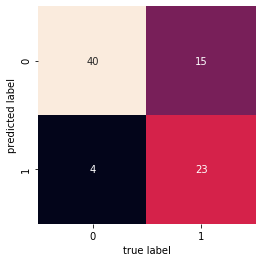

In [25]:
 for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    kernel = 1.0 * RBF(1.0)
    model = GaussianProcessClassifier(kernel=kernel)
    model.fit(train,y_train)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("===================================================")

PCA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



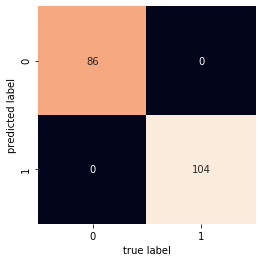

LDA
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89        86
         1.0       0.92      0.89      0.91       104

    accuracy                           0.90       190
   macro avg       0.90      0.90      0.90       190
weighted avg       0.90      0.90      0.90       190



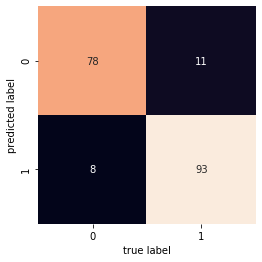

normalized
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       104

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



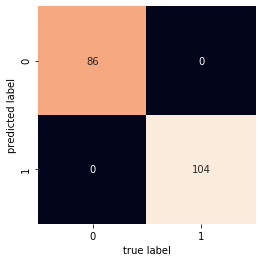

In [26]:
 for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    kernel = 1.0 * RBF(1.0)
    model = GaussianProcessClassifier(kernel=kernel)
    model.fit(train,y_train)
    y_predict = model.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("=================================================")

In [27]:
for classifier in [GaussianProcessClassifier(kernel=kernel),SVC(),MLPClassifier()]:
    print("Normalized")
    process = Pipeline(steps=[ ('scaler',MinMaxScaler()),('clf',classifier)])
    print(cross_val_score(process,X.to_numpy(),Y1.values,cv=10))
    print("LDA")
    process = Pipeline(steps=[ ('scaler',MinMaxScaler()),('lda',LinearDiscriminantAnalysis()),('clf',classifier)])
    print(cross_val_score(process,X.to_numpy(),Y1.values,cv=10))
    print("PCA")
    process = Pipeline(steps=[ ('scaler',MinMaxScaler()),('pca',PCA(n_components=99)), ('clf',classifier)])
    print(cross_val_score(process,X.to_numpy(),Y1.values,cv=10))
    print("======================================================")

Normalized
[0.57142857 0.64285714 0.7037037  0.7037037  0.77777778 0.74074074
 0.74074074 0.81481481 0.88888889 0.66666667]
LDA
[0.78571429 0.89285714 0.92592593 0.88888889 0.85185185 0.92592593
 0.85185185 0.62962963 0.74074074 0.74074074]
PCA
[0.64285714 0.64285714 0.7037037  0.7037037  0.81481481 0.77777778
 0.62962963 0.81481481 0.77777778 0.66666667]
Normalized
[0.78571429 0.82142857 0.85185185 0.96296296 0.85185185 0.88888889
 0.88888889 0.62962963 0.81481481 0.77777778]
LDA
[0.82142857 0.89285714 0.88888889 0.88888889 0.85185185 0.92592593
 0.85185185 0.59259259 0.7037037  0.77777778]
PCA
[0.89285714 0.71428571 0.74074074 0.88888889 0.77777778 0.85185185
 0.96296296 0.7037037  0.7037037  0.66666667]
Normalized
[0.82142857 0.89285714 0.88888889 0.92592593 0.85185185 0.92592593
 0.88888889 0.7037037  0.77777778 0.85185185]
LDA
[0.82142857 0.89285714 0.92592593 0.88888889 0.85185185 0.92592593
 0.85185185 0.62962963 0.7037037  0.77777778]
PCA
[0.82142857 0.89285714 0.96296296 0.888

In [28]:
pateint = pd.read_csv("test.csv")
pateint = pateint[pateint['class'] != 0] 
pateint = pateint.loc[:,pateint.isnull().mean() <0.3]
for col in pateint.columns:
    pateint[col].fillna(pateint[col].median(), inplace=True)

In [29]:
Y = pateint.loc[:,'class']
X = pateint.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [30]:
numeric_transformer = Pipeline(steps=[ ('scaler',MinMaxScaler()),('pca',PCA(n_components=99))])
X_train_tr = numeric_transformer.fit_transform(X_train)
X_test_tr = numeric_transformer.transform(X_test)
numeric_transformer_ld = Pipeline(steps=[ ('scaler',MinMaxScaler()),('lda',LinearDiscriminantAnalysis())])
X_train_ld = numeric_transformer_ld.fit_transform(X_train,y_train)
X_test_ld = numeric_transformer_ld.transform(X_test)
scaler = MinMaxScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [31]:
all_test = [X_test_tr,X_test_ld,X_test_]
all_train = [X_train_tr,X_train_ld,X_train_]
all_ = ['PCA','LDA','normalized']

PCA
Kernel: linear
              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91        15
         2.0       0.79      0.65      0.71        17
         3.0       0.73      0.73      0.73        11

    accuracy                           0.79        43
   macro avg       0.78      0.79      0.78        43
weighted avg       0.79      0.79      0.78        43



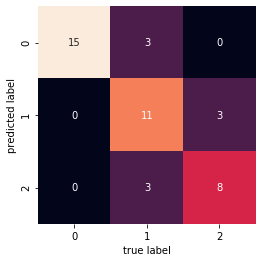

Kernel: poly
              precision    recall  f1-score   support

         1.0       1.00      0.20      0.33        15
         2.0       0.67      0.12      0.20        17
         3.0       0.30      1.00      0.46        11

    accuracy                           0.37        43
   macro avg       0.65      0.44      0.33        43
weighted avg       0.69      0.37      0.31        43



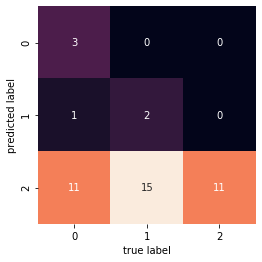

Kernel: rbf
              precision    recall  f1-score   support

         1.0       1.00      0.93      0.97        15
         2.0       0.83      0.59      0.69        17
         3.0       0.59      0.91      0.71        11

    accuracy                           0.79        43
   macro avg       0.81      0.81      0.79        43
weighted avg       0.83      0.79      0.79        43



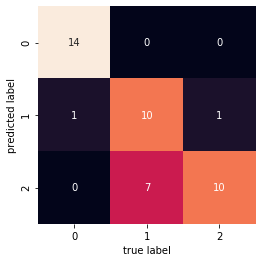

Kernel: sigmoid
              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91        15
         2.0       0.83      0.59      0.69        17
         3.0       0.69      0.82      0.75        11

    accuracy                           0.79        43
   macro avg       0.79      0.80      0.78        43
weighted avg       0.80      0.79      0.78        43



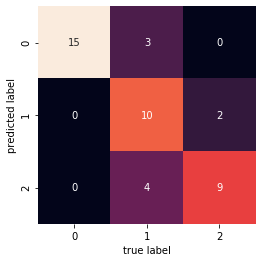

LDA
Kernel: linear
              precision    recall  f1-score   support

         1.0       0.79      1.00      0.88        15
         2.0       0.83      0.59      0.69        17
         3.0       0.75      0.82      0.78        11

    accuracy                           0.79        43
   macro avg       0.79      0.80      0.78        43
weighted avg       0.80      0.79      0.78        43



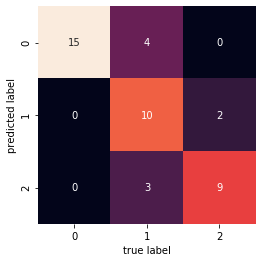

Kernel: poly
              precision    recall  f1-score   support

         1.0       0.81      0.87      0.84        15
         2.0       0.65      0.76      0.70        17
         3.0       0.86      0.55      0.67        11

    accuracy                           0.74        43
   macro avg       0.77      0.73      0.74        43
weighted avg       0.76      0.74      0.74        43



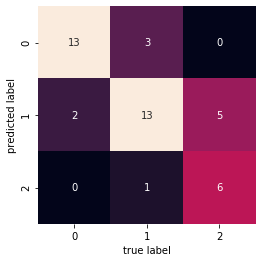

Kernel: rbf
              precision    recall  f1-score   support

         1.0       0.81      0.87      0.84        15
         2.0       0.75      0.53      0.62        17
         3.0       0.67      0.91      0.77        11

    accuracy                           0.74        43
   macro avg       0.74      0.77      0.74        43
weighted avg       0.75      0.74      0.73        43



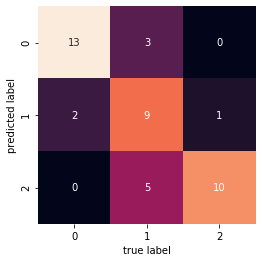

Kernel: sigmoid
              precision    recall  f1-score   support

         1.0       0.78      0.93      0.85        15
         2.0       0.73      0.65      0.69        17
         3.0       0.80      0.73      0.76        11

    accuracy                           0.77        43
   macro avg       0.77      0.77      0.77        43
weighted avg       0.77      0.77      0.76        43



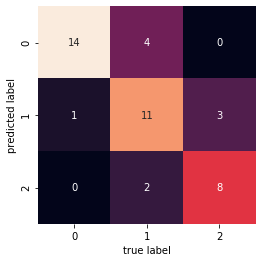

normalized
Kernel: linear
              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91        15
         2.0       0.79      0.65      0.71        17
         3.0       0.73      0.73      0.73        11

    accuracy                           0.79        43
   macro avg       0.78      0.79      0.78        43
weighted avg       0.79      0.79      0.78        43



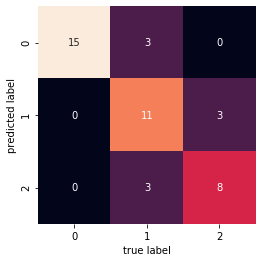

Kernel: poly
              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91        15
         2.0       0.85      0.65      0.73        17
         3.0       0.75      0.82      0.78        11

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.81        43
weighted avg       0.82      0.81      0.81        43



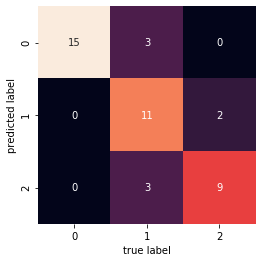

Kernel: rbf
              precision    recall  f1-score   support

         1.0       0.79      1.00      0.88        15
         2.0       0.85      0.65      0.73        17
         3.0       0.73      0.73      0.73        11

    accuracy                           0.79        43
   macro avg       0.79      0.79      0.78        43
weighted avg       0.80      0.79      0.78        43



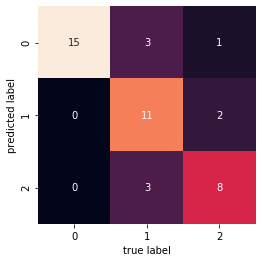

Kernel: sigmoid
              precision    recall  f1-score   support

         1.0       0.68      1.00      0.81        15
         2.0       0.75      0.18      0.29        17
         3.0       0.59      0.91      0.71        11

    accuracy                           0.65        43
   macro avg       0.67      0.70      0.60        43
weighted avg       0.68      0.65      0.58        43



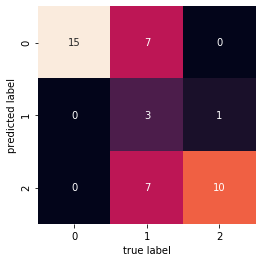

In [32]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        print("Kernel: " + kernel)
        model = SVC(kernel=kernel)
        model.fit(train,y_train)
        y_predict = model.predict(test)
        plot_print_confusion(y_test,y_predict)
        plt.show()
    print("==================================================================================")

PCA
Kernel: linear
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



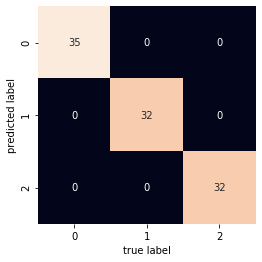

Kernel: poly
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



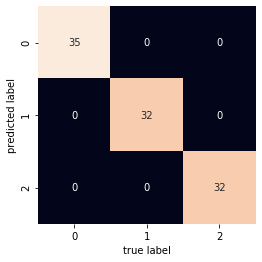

Kernel: rbf
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



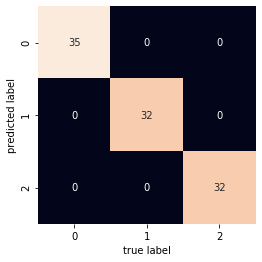

Kernel: sigmoid
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97        35
         2.0       1.00      0.91      0.95        32
         3.0       0.91      1.00      0.96        32

    accuracy                           0.96        99
   macro avg       0.96      0.96      0.96        99
weighted avg       0.96      0.96      0.96        99



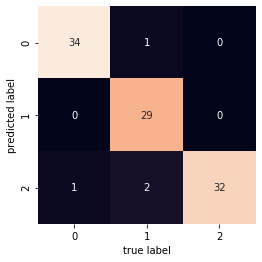

LDA
Kernel: linear
              precision    recall  f1-score   support

         1.0       0.88      0.80      0.84        35
         2.0       0.61      0.72      0.66        32
         3.0       0.76      0.69      0.72        32

    accuracy                           0.74        99
   macro avg       0.75      0.74      0.74        99
weighted avg       0.75      0.74      0.74        99



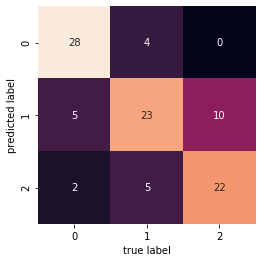

Kernel: poly
              precision    recall  f1-score   support

         1.0       0.97      0.83      0.89        35
         2.0       0.60      0.91      0.72        32
         3.0       0.90      0.59      0.72        32

    accuracy                           0.78        99
   macro avg       0.83      0.78      0.78        99
weighted avg       0.83      0.78      0.78        99



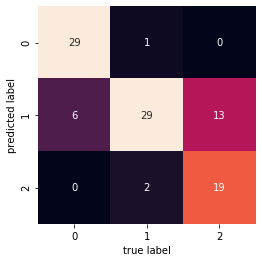

Kernel: rbf
              precision    recall  f1-score   support

         1.0       0.97      0.80      0.88        35
         2.0       0.71      0.78      0.75        32
         3.0       0.77      0.84      0.81        32

    accuracy                           0.81        99
   macro avg       0.82      0.81      0.81        99
weighted avg       0.82      0.81      0.81        99



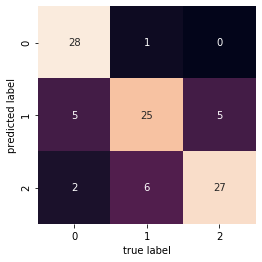

Kernel: sigmoid
              precision    recall  f1-score   support

         1.0       0.85      0.83      0.84        35
         2.0       0.58      0.66      0.62        32
         3.0       0.69      0.62      0.66        32

    accuracy                           0.71        99
   macro avg       0.71      0.70      0.70        99
weighted avg       0.71      0.71      0.71        99



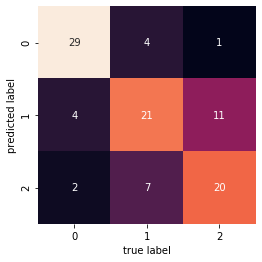

normalized
Kernel: linear
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



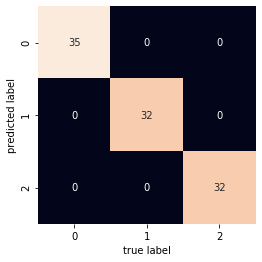

Kernel: poly
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



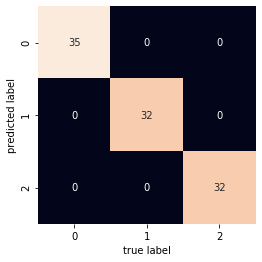

Kernel: rbf
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



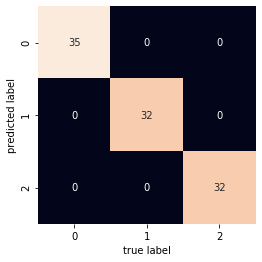

Kernel: sigmoid
              precision    recall  f1-score   support

         1.0       0.57      0.94      0.71        35
         2.0       0.00      0.00      0.00        32
         3.0       0.78      1.00      0.88        32

    accuracy                           0.66        99
   macro avg       0.45      0.65      0.53        99
weighted avg       0.45      0.66      0.53        99



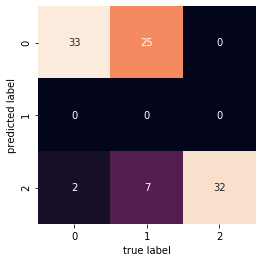

In [33]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
        print("Kernel: " + kernel)
        model = SVC(kernel=kernel)
        model.fit(train,y_train)
        y_predict = model.predict(train)
        plot_print_confusion(y_train,y_predict)
        plt.show()
    print("===================================================================")

PCA
Activation Function: relu
              precision    recall  f1-score   support

         1.0       0.88      0.93      0.90        15
         2.0       0.77      0.59      0.67        17
         3.0       0.64      0.82      0.72        11

    accuracy                           0.77        43
   macro avg       0.76      0.78      0.76        43
weighted avg       0.77      0.77      0.76        43



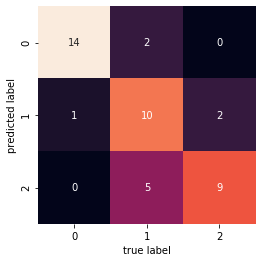

Activation Function: tanh
              precision    recall  f1-score   support

         1.0       0.78      0.93      0.85        15
         2.0       0.75      0.53      0.62        17
         3.0       0.69      0.82      0.75        11

    accuracy                           0.74        43
   macro avg       0.74      0.76      0.74        43
weighted avg       0.74      0.74      0.73        43



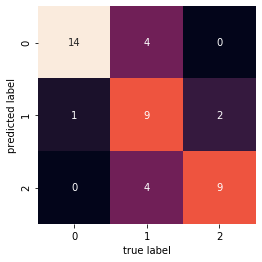

Activation Function: logistic
              precision    recall  f1-score   support

         1.0       0.78      0.93      0.85        15
         2.0       0.73      0.65      0.69        17
         3.0       0.80      0.73      0.76        11

    accuracy                           0.77        43
   macro avg       0.77      0.77      0.77        43
weighted avg       0.77      0.77      0.76        43



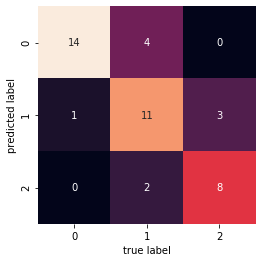

LDA
Activation Function: relu
              precision    recall  f1-score   support

         1.0       0.79      1.00      0.88        15
         2.0       0.80      0.47      0.59        17
         3.0       0.64      0.82      0.72        11

    accuracy                           0.74        43
   macro avg       0.74      0.76      0.73        43
weighted avg       0.76      0.74      0.73        43



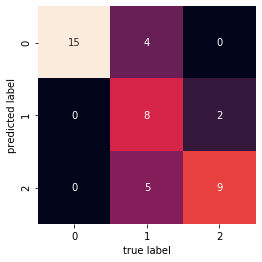

Activation Function: tanh
              precision    recall  f1-score   support

         1.0       0.79      1.00      0.88        15
         2.0       0.82      0.53      0.64        17
         3.0       0.69      0.82      0.75        11

    accuracy                           0.77        43
   macro avg       0.77      0.78      0.76        43
weighted avg       0.78      0.77      0.75        43



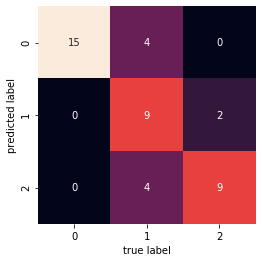

Activation Function: logistic
              precision    recall  f1-score   support

         1.0       0.79      1.00      0.88        15
         2.0       0.82      0.53      0.64        17
         3.0       0.69      0.82      0.75        11

    accuracy                           0.77        43
   macro avg       0.77      0.78      0.76        43
weighted avg       0.78      0.77      0.75        43



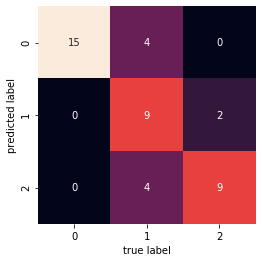

normalized
Activation Function: relu
              precision    recall  f1-score   support

         1.0       0.88      1.00      0.94        15
         2.0       0.80      0.71      0.75        17
         3.0       0.73      0.73      0.73        11

    accuracy                           0.81        43
   macro avg       0.80      0.81      0.80        43
weighted avg       0.81      0.81      0.81        43



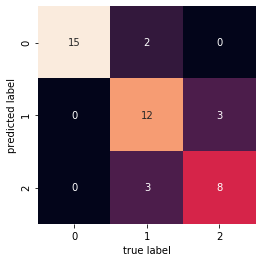

Activation Function: tanh
              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91        15
         2.0       0.85      0.65      0.73        17
         3.0       0.75      0.82      0.78        11

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.81        43
weighted avg       0.82      0.81      0.81        43



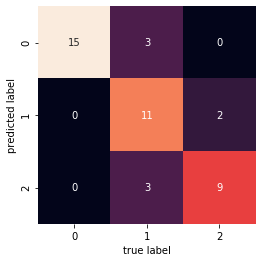

Activation Function: logistic
              precision    recall  f1-score   support

         1.0       0.82      0.93      0.87        15
         2.0       0.77      0.59      0.67        17
         3.0       0.69      0.82      0.75        11

    accuracy                           0.77        43
   macro avg       0.76      0.78      0.76        43
weighted avg       0.77      0.77      0.76        43



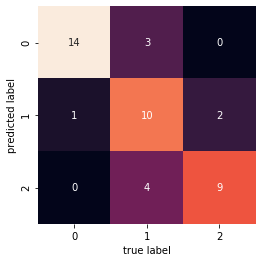

In [34]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for activation in ['relu', 'tanh', 'logistic']:
        print("Activation Function: " + activation)
        model = MLPClassifier(activation=activation)
        model.fit(train,y_train)
        y_predict = model.predict(test)
        plot_print_confusion(y_test,y_predict)
        plt.show()
    print("===================================================")

PCA
Activation Function: relu
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



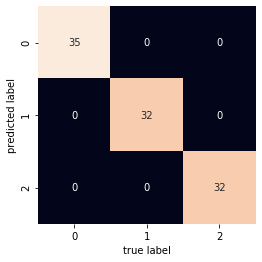

Activation Function: tanh
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



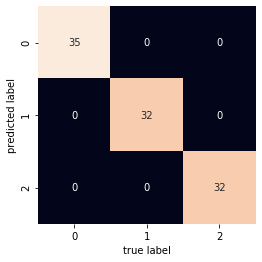

Activation Function: logistic
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



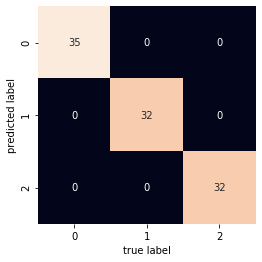

LDA
Activation Function: relu
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



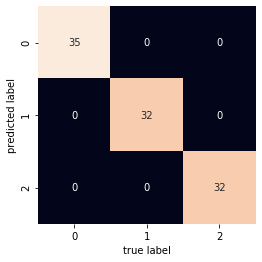

Activation Function: tanh
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



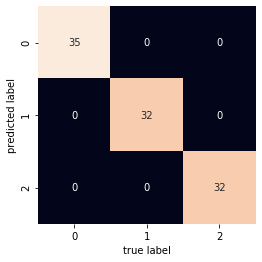

Activation Function: logistic
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



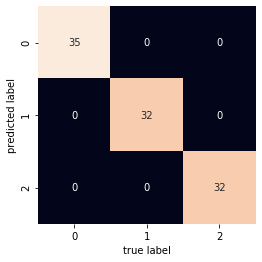

normalized
Activation Function: relu
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



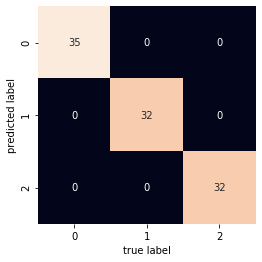

Activation Function: tanh
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



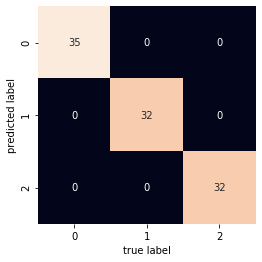

Activation Function: logistic
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



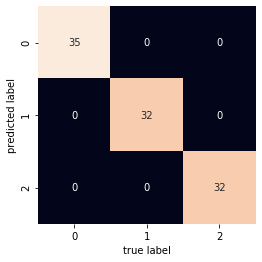

In [35]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    for activation in ['relu', 'tanh', 'logistic']:
        print("Activation Function: " + activation)
        model = MLPClassifier(activation=activation)
        model.fit(X_train_tr,y_train)
        y_predict = model.predict(X_train_tr)
        plot_print_confusion(y_train,y_predict)
        plt.show()
    print("======================================================")

PCA
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        15
         2.0       0.00      0.00      0.00        17
         3.0       0.26      1.00      0.41        11

    accuracy                           0.26        43
   macro avg       0.09      0.33      0.14        43
weighted avg       0.07      0.26      0.10        43



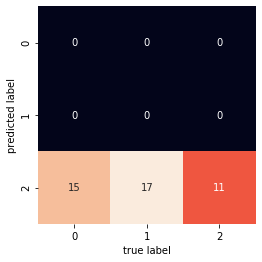

LDA
              precision    recall  f1-score   support

         1.0       0.78      0.93      0.85        15
         2.0       0.75      0.53      0.62        17
         3.0       0.69      0.82      0.75        11

    accuracy                           0.74        43
   macro avg       0.74      0.76      0.74        43
weighted avg       0.74      0.74      0.73        43



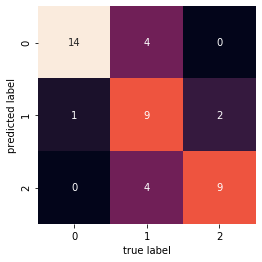

normalized
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        15
         2.0       0.00      0.00      0.00        17
         3.0       0.26      1.00      0.41        11

    accuracy                           0.26        43
   macro avg       0.09      0.33      0.14        43
weighted avg       0.07      0.26      0.10        43



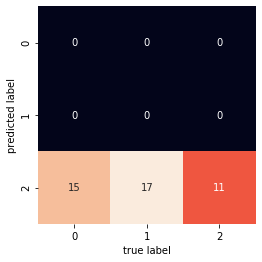

In [36]:
 for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    kernel = 1.0 * RBF(1.0)
    model = GaussianProcessClassifier(kernel=kernel)
    model.fit(train,y_train)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("===================================================")

PCA
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



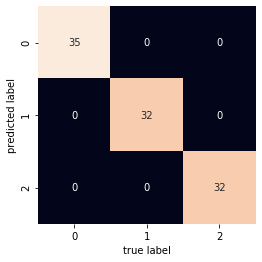

LDA
              precision    recall  f1-score   support

         1.0       0.85      0.80      0.82        35
         2.0       0.67      0.69      0.68        32
         3.0       0.79      0.81      0.80        32

    accuracy                           0.77        99
   macro avg       0.77      0.77      0.77        99
weighted avg       0.77      0.77      0.77        99



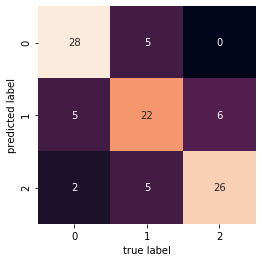

normalized
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



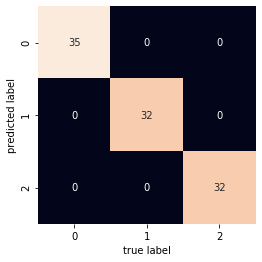

In [37]:
 for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    kernel = 1.0 * RBF(1.0)
    model = GaussianProcessClassifier(kernel=kernel)
    model.fit(train,y_train)
    y_predict = model.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("=================================================")

PCA
              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91        15
         2.0       0.83      0.59      0.69        17
         3.0       0.69      0.82      0.75        11

    accuracy                           0.79        43
   macro avg       0.79      0.80      0.78        43
weighted avg       0.80      0.79      0.78        43



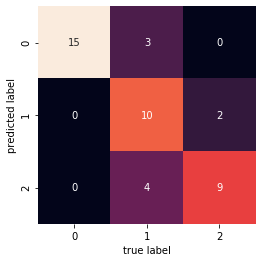

LDA
              precision    recall  f1-score   support

         1.0       0.79      1.00      0.88        15
         2.0       0.82      0.53      0.64        17
         3.0       0.69      0.82      0.75        11

    accuracy                           0.77        43
   macro avg       0.77      0.78      0.76        43
weighted avg       0.78      0.77      0.75        43



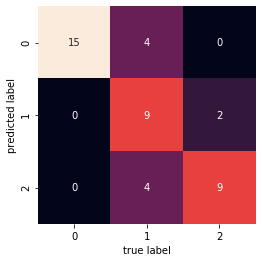

normalized
              precision    recall  f1-score   support

         1.0       0.83      1.00      0.91        15
         2.0       0.83      0.59      0.69        17
         3.0       0.69      0.82      0.75        11

    accuracy                           0.79        43
   macro avg       0.79      0.80      0.78        43
weighted avg       0.80      0.79      0.78        43



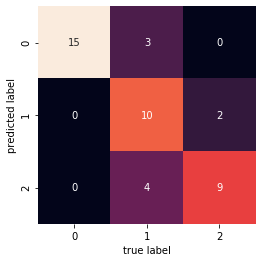

In [38]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)   
    model = LogisticRegression()
    model.fit(train,y_train)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("=====================================================")

PCA
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



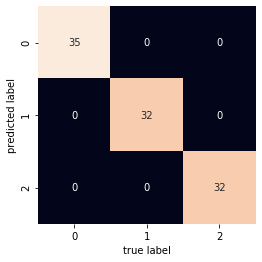

LDA
              precision    recall  f1-score   support

         1.0       0.85      0.83      0.84        35
         2.0       0.63      0.69      0.66        32
         3.0       0.77      0.72      0.74        32

    accuracy                           0.75        99
   macro avg       0.75      0.74      0.75        99
weighted avg       0.75      0.75      0.75        99



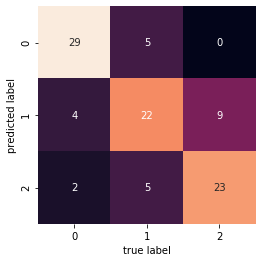

normalized
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        35
         2.0       1.00      1.00      1.00        32
         3.0       1.00      1.00      1.00        32

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



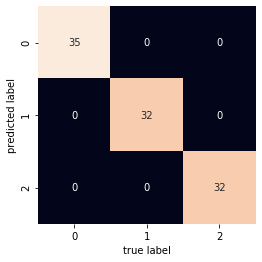

In [39]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    model = LogisticRegression()
    model.fit(train,y_train)
    y_predict = model.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("======================================================")

PCA
              precision    recall  f1-score   support

         1.0       0.92      0.80      0.86        15
         2.0       0.71      0.59      0.65        17
         3.0       0.62      0.91      0.74        11

    accuracy                           0.74        43
   macro avg       0.75      0.77      0.75        43
weighted avg       0.76      0.74      0.74        43



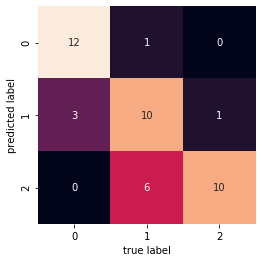

LDA
              precision    recall  f1-score   support

         1.0       0.82      0.93      0.87        15
         2.0       0.80      0.47      0.59        17
         3.0       0.62      0.91      0.74        11

    accuracy                           0.74        43
   macro avg       0.75      0.77      0.74        43
weighted avg       0.76      0.74      0.73        43



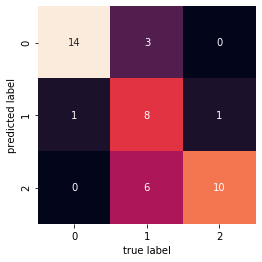

normalized
              precision    recall  f1-score   support

         1.0       0.92      0.80      0.86        15
         2.0       0.71      0.59      0.65        17
         3.0       0.62      0.91      0.74        11

    accuracy                           0.74        43
   macro avg       0.75      0.77      0.75        43
weighted avg       0.76      0.74      0.74        43



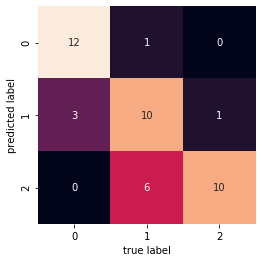

In [40]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(train,y_train)
    y_predict = model.predict(test)
    plot_print_confusion(y_test,y_predict)
    plt.show()
    print("==============================================")

PCA
              precision    recall  f1-score   support

         1.0       0.85      0.66      0.74        35
         2.0       0.67      0.75      0.71        32
         3.0       0.81      0.91      0.85        32

    accuracy                           0.77        99
   macro avg       0.77      0.77      0.77        99
weighted avg       0.78      0.77      0.77        99



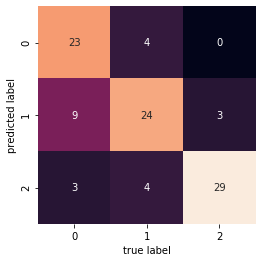

LDA
              precision    recall  f1-score   support

         1.0       0.90      0.80      0.85        35
         2.0       0.76      0.69      0.72        32
         3.0       0.77      0.94      0.85        32

    accuracy                           0.81        99
   macro avg       0.81      0.81      0.80        99
weighted avg       0.81      0.81      0.81        99



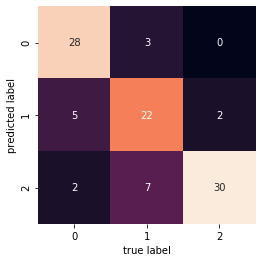

normalized
              precision    recall  f1-score   support

         1.0       0.85      0.66      0.74        35
         2.0       0.67      0.75      0.71        32
         3.0       0.81      0.91      0.85        32

    accuracy                           0.77        99
   macro avg       0.77      0.77      0.77        99
weighted avg       0.78      0.77      0.77        99



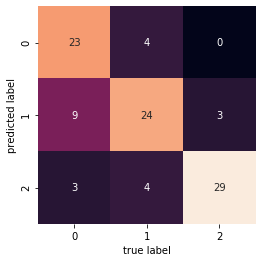

In [41]:
for train, test, which in zip(all_train,all_test,all_):
    print(which)    
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(train,y_train)
    y_predict = model.predict(train)
    plot_print_confusion(y_train,y_predict)
    plt.show()
    print("=========================================")

In [42]:
for classifier in [GaussianProcessClassifier(kernel=kernel),SVC(),MLPClassifier()]:
    print("Normalized")
    process = Pipeline(steps=[ ('scaler',MinMaxScaler()),('clf',classifier)])
    print(cross_val_score(process,X.to_numpy(),Y.values,cv=10))
    print("LDA")
    process = Pipeline(steps=[ ('scaler',MinMaxScaler()),('lda',LinearDiscriminantAnalysis()),('clf',classifier)])
    print(cross_val_score(process,X.to_numpy(),Y.values,cv=10))
    print("PCA")
    process = Pipeline(steps=[ ('scaler',MinMaxScaler()),('pca',PCA(n_components=99)),('clf',classifier)])
    print(cross_val_score(process,X.to_numpy(),Y.values,cv=10))
    print("======================================================")

Normalized
[0.33333333 0.33333333 0.28571429 0.28571429 0.28571429 0.28571429
 0.28571429 0.28571429 0.28571429 0.35714286]
LDA
[0.86666667 0.6        0.85714286 0.85714286 0.71428571 0.78571429
 0.71428571 0.57142857 0.78571429 0.71428571]
PCA
[0.33333333 0.33333333 0.28571429 0.28571429 0.28571429 0.28571429
 0.28571429 0.28571429 0.28571429 0.35714286]
Normalized
[0.73333333 0.73333333 0.85714286 0.85714286 0.71428571 0.92857143
 0.78571429 0.35714286 0.85714286 0.85714286]
LDA
[0.86666667 0.66666667 0.85714286 0.85714286 0.71428571 0.78571429
 0.71428571 0.57142857 0.78571429 0.71428571]
PCA
[0.86666667 0.66666667 0.71428571 0.85714286 0.78571429 0.78571429
 0.85714286 0.64285714 0.85714286 0.85714286]
Normalized
[0.8        0.73333333 0.85714286 0.85714286 0.71428571 0.85714286
 0.78571429 0.64285714 0.85714286 0.85714286]
LDA
[0.86666667 0.66666667 0.85714286 0.85714286 0.71428571 0.78571429
 0.71428571 0.57142857 0.71428571 0.71428571]
PCA
[0.66666667 0.73333333 0.78571429 0.857

In [43]:
Y = pateint.loc[:,'class']
X = pateint.drop(['class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Accuracy: 0.317
              precision    recall  f1-score   support

         1.0       1.00      0.02      0.04        50
         2.0       0.50      0.02      0.04        49
         3.0       0.31      1.00      0.47        43

    accuracy                           0.32       142
   macro avg       0.60      0.35      0.18       142
weighted avg       0.62      0.32      0.17       142



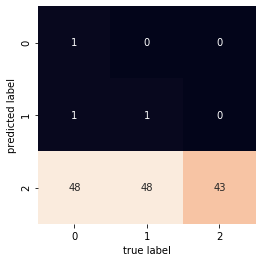

Accuracy: 0.775
              precision    recall  f1-score   support

         1.0       0.87      0.80      0.83        50
         2.0       0.72      0.63      0.67        49
         3.0       0.74      0.91      0.81        43

    accuracy                           0.77       142
   macro avg       0.78      0.78      0.77       142
weighted avg       0.78      0.77      0.77       142



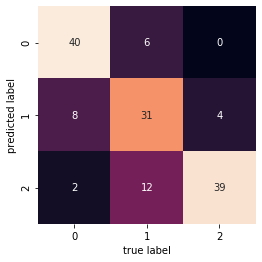

Accuracy: 0.775
              precision    recall  f1-score   support

         1.0       0.80      0.86      0.83        50
         2.0       0.72      0.63      0.67        49
         3.0       0.80      0.84      0.82        43

    accuracy                           0.77       142
   macro avg       0.77      0.78      0.77       142
weighted avg       0.77      0.77      0.77       142



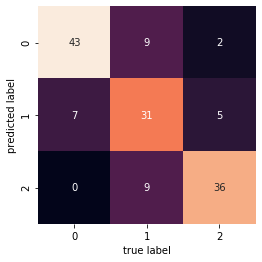

In [44]:
for model in [GaussianProcessClassifier(),SVC(),MLPClassifier()]:
    cv = LeaveOneOut()
    # enumerate splits
    y_true, y_pred = list(), list()
    for train_ix, test_ix in cv.split(X):
        # split data
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = Y.iloc[train_ix], Y.iloc[test_ix]
        X_train_tr = numeric_transformer.fit_transform(X_train)
        X_test_tr = numeric_transformer.transform(X_test)
        # fit model
        model.fit(X_train_tr, y_train)
        # evaluate model
        yhat = model.predict(X_test_tr)
        # store
        y_true.append(y_test.iloc[0])
        y_pred.append(yhat[0])
    # calculate accuracy
    acc = accuracy_score(y_true, y_pred)
    print('Accuracy: %.3f' % acc)
    plot_print_confusion(y_true,y_pred)
    plt.show()